# Visualization of results for the Basque case study

In [39]:
import matplotlib.pyplot as plt  
import numpy as np
import os
import sys
import pandas as pd
import geopandas as gpd
import yaml

In [40]:
case_study_name = "cs_2025-04-02_14-27-31"
input_file_name = "transport_data_years_v87_balanced_expansion.yaml"

current_path = os.getcwd()
print("Current path:", current_path)
file_results = os.path.normpath(current_path + "/results")
print("File results:", os.path.normpath(file_results))
file_path = os.path.join(current_path, "/results")
print(file_path)
# Normalize the path
normalized_path = os.path.normpath(file_path)
print("Normalized path:", normalized_path)

Current path: c:\Github\iDesignRES_transcompmodel\examples\Basque country
File results: c:\Github\iDesignRES_transcompmodel\examples\Basque country\results
c:/results
Normalized path: c:\results


In [41]:
checked_path = os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_plus_dict.yaml")
if os.path.exists(checked_path):
    print(f"The path {checked_path} exists.")
else:
    print(f"The path {checked_path} does not exist.")

The path c:\Github\iDesignRES_transcompmodel\examples\Basque country\results\cs_2025-04-02_14-27-31_budget_penalty_plus_dict.yaml exists.


## Reading input data

In [42]:
folder_input = os.path.normpath(current_path + "/data")
with open(folder_input + "/" + input_file_name) as file:
    input_data = yaml.safe_load(file)

## Reading output data

In [43]:
# with open(os.path.normpath(file_results + "/" + case_study_name + "_n_fueling_dict.yaml")) as file:
#     n_fueling_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_minus_dict.yaml")) as file:
    budget_penalty_minus_dict = yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_plus_dict.yaml")) as file:
    budget_penalty_plus_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_plus_yearly_dict.yaml")) as file:
    budget_penalty_plus_yearly_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_budget_penalty_minus_yearly_dict.yaml")) as file:
    budget_penalty_minus_yearly_dict= yaml.safe_load(file)
# with open(os.path.normpath(file_results + "/" + case_study_name + "_detour_time_dict.yaml")) as file:
#     detour_time_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_f_dict.yaml")) as file:
    f_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_h_dict.yaml")) as file:
    h_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_h_exist_dict.yaml")) as file:
    h_exist_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_h_minus_dict.yaml")) as file:
    h_minus_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_h_plus_dict.yaml")) as file:
    h_plus_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_q_fuel_infr_plus_dict.yaml")) as file:
    q_fuel_infr_plus_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_q_mode_infr_plus_dict.yaml")) as file:
    q_mode_infr_plus_dict= yaml.safe_load(file)

with open(os.path.normpath(file_results + "/" + case_study_name + "_s.yaml")) as file:
    s_dict= yaml.safe_load(file)



In [44]:
def process_key(key):
    # Convert string key to a tuple
    return safe_tuple_parser(key)

def process_value(value):
    # Convert string value to float
    return float(value)

def safe_tuple_parser(key):
    """
    Safely parses string representations of nested 
    tuples into actual Python tuples.
    Example: "(2024, (1, 7, 0), (1, 8), 2024)" -> (2024, (1, 7, 0), (1, 8), 2024)
    """
    import ast  # Abstract Syntax Tree module for safe literal evaluation

    # Remove outer quotes if present and use `ast.literal_eval`
    try:
        return ast.literal_eval(key)
    except (SyntaxError, ValueError) as e:
        raise ValueError(f"Failed to parse key: {key}") from e



budget_penalty_minus = {process_key(key): process_value(value) for key, value in budget_penalty_minus_dict.items()}
budget_penalty_plus = {process_key(key): process_value(value) for key, value in budget_penalty_plus_dict.items()}
budget_penalty_plus_yearly = {process_key(key): process_value(value) for key, value in budget_penalty_plus_yearly_dict.items()}
budget_penalty_minus_yearly = {process_key(key): process_value(value) for key, value in budget_penalty_minus_yearly_dict.items()}
#detour_time = {process_key(key): process_value(value) for key, value in detour_time_dict.items()}
f = {process_key(key): process_value(value) for key, value in f_dict.items()}
h = {process_key(key): process_value(value) for key, value in h_dict.items()}
h_exist = {process_key(key): process_value(value) for key, value in h_exist_dict.items()}
h_minus = {process_key(key): process_value(value) for key, value in h_minus_dict.items()}
h_plus = {process_key(key): process_value(value) for key, value in h_plus_dict.items()}
q_fuel_infr_plus = {process_key(key): process_value(value) for key, value in q_fuel_infr_plus_dict.items()}
q_mode_infr_plus = {process_key(key): process_value(value) for key, value in q_mode_infr_plus_dict.items()}
s = {process_key(key): process_value(value) for key, value in s_dict.items()}
# n_fueling = {process_key(key): process_value(value) for key, value in n_fueling_dict.items()}


## Visualizations

- cummulative shift (vehicle stock after different types and technologies) (check!)
- shift by income class (check!)
- mode shift (check!)
- infrastructure expansion by year for each technology (check!)
- *impact of route length*

In [45]:
print(input_data.keys())
model_parameters = input_data["Model"]
print(model_parameters)

Y = model_parameters["Y"]
y_init = model_parameters["y_init"]
pre_y = model_parameters["pre_y"]

G = pre_y + Y
g_init = y_init - pre_y
Y_end = y_init + Y - 1


dict_keys(['DetourTimeReduction', 'Edge', 'FinancialStatus', 'Fuel', 'GeographicElement', 'InitDetourTime', 'InitialFuelingInfr', 'InitialModeInfr', 'InitialVehicleStock', 'Initial_Mode_Share', 'Market_shares', 'Mode', 'Model', 'Node', 'Odpair', 'Path', 'Product', 'Regiontype', 'Speed', 'TechVehicle', 'Technology', 'Vehicletype'])
{'E': 12, 'N': 2, 'Y': 31, 'budget_penalty_minus': 1000000, 'budget_penalty_plus': 1000000, 'budget_penalty_yearly_minus': 1000000, 'budget_penalty_yearly_plus': 1000000, 'discount_rate': 0.05, 'gamma': 0.0003, 'goals_no_new_ICEV': {2035: 0.0}, 'goals_tot_BEV': {2030: 230.0}, 'investment_period': 5, 'pre_y': 25, 'y_init': 2020}


In [46]:
# print(input_data.keys())
fuel_list = input_data["Fuel"]
mode_list = input_data["Mode"]
techvehicle_list = input_data["TechVehicle"]
odpair_list = input_data["Odpair"]  
financial_status_list = input_data["FinancialStatus"]

od_pair_list_by_year = {}
for y in range(y_init, Y_end + 1):

    od_pair_list_by_year[y] = sum(odpair_list[r]["F"][y - y_init] for r in range(0, len(odpair_list)))


fuel_list = {item["id"]: item for item in fuel_list}
mode_list = {item["id"]: item for item in mode_list}
techvehicle_list = {item["id"]: item for item in techvehicle_list}
odpair_list = {item["id"]: item for item in odpair_list}
financial_status_list = {item["id"]: item for item in financial_status_list}

# calculating for each technology and each year the total cost
def get_vehicle_stock(by_income_class = False, income_class=None):
    techveh_stock = {}

    for tv_id in techvehicle_list:

        for y in range(y_init, Y_end + 1):
            if not by_income_class:
                total_veh_number = sum(h[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in odpair_list.keys() if (y, r, tv_id, g) in h.keys())
            else:
                total_veh_number = sum(h[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in odpair_list.keys() if odpair_list[r]["financial_status"] == income_class and (y, r, tv_id, g) in h.keys())
            techveh_stock[(y, tv_id)] = total_veh_number
    return techveh_stock

In [47]:
# color palette defintion"
colors_techvehicles = ["#f7b267", "#76c893", "#c0b9dd", "#4f5d75", "#c9ada7", "#9a8c98", "#8e9aaf", "#8b8c89", "#463f3a", "#595959", "#604d53"]

In [48]:
veh_stock = get_vehicle_stock(True, "Commercial")
print(veh_stock)

{(2020, 0): 49834.931746, (2021, 0): 42300.583668, (2022, 0): 35623.743248, (2023, 0): 29393.427006, (2024, 0): 29141.195646, (2025, 0): 27463.224063, (2026, 0): 23664.885523, (2027, 0): 19431.128073, (2028, 0): 19594.369894, (2029, 0): 14437.431094, (2030, 0): 13717.645887, (2031, 0): 11372.301703, (2032, 0): 10176.687079, (2033, 0): 7392.9474820000005, (2034, 0): 8018.436375, (2035, 0): 7330.416695, (2036, 0): 6272.57653, (2037, 0): 5863.690071, (2038, 0): 5155.097492, (2039, 0): 3545.635773, (2040, 0): 2530.312487, (2041, 0): 1916.174776, (2042, 0): 1315.328211, (2043, 0): 669.94, (2044, 0): 0.0, (2045, 0): 0.0, (2046, 0): 0.0, (2047, 0): 0.0, (2048, 0): 0.0, (2049, 0): 0.0, (2050, 0): 0.0, (2020, 1): 3964.58887, (2021, 1): 5572.929986, (2022, 1): 7134.698574, (2023, 1): 8657.172198, (2024, 1): 10141.333231, (2025, 1): 11588.13949, (2026, 1): 12997.574843, (2027, 1): 14371.499811, (2028, 1): 15706.692155, (2029, 1): 17012.23744, (2030, 1): 18288.979593, (2031, 1): 19533.251441, (203

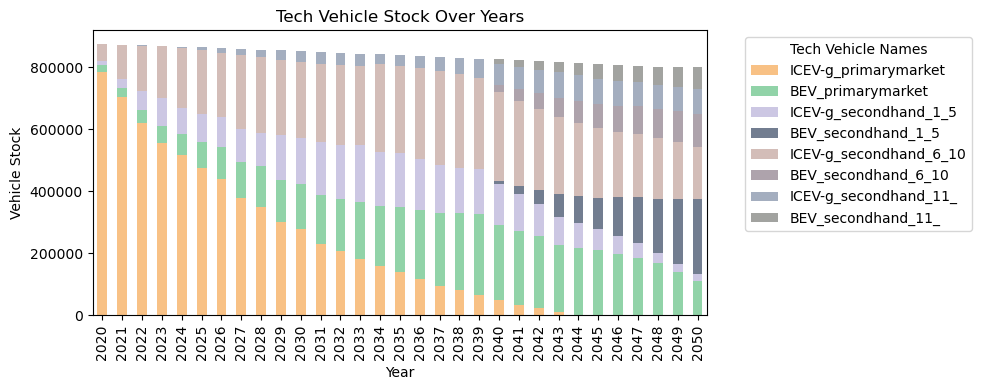

{2020: [783625.031004,
  21752.885041,
  13433.299448,
  0.0,
  55938.700368,
  0.0,
  153.721606,
  0.0],
 2021: [703001.410853,
  28600.462451,
  31015.557861,
  0.0,
  109203.97474399999,
  0.0,
  942.337382,
  0.0],
 2022: [620196.378989,
  41325.646016,
  60567.257891,
  0.0,
  147395.122522,
  0.0,
  988.498424,
  0.0],
 2023: [556010.797587,
  54175.195928,
  90488.553,
  0.0,
  166561.875582,
  0.0,
  1056.319363,
  0.0],
 2024: [517417.820321,
  66168.473595,
  83695.363659,
  0.0,
  194626.292796,
  0.0,
  4037.951146,
  0.0],
 2025: [475803.533163,
  81573.935158,
  92762.627698,
  0.0,
  205388.199156,
  0.0,
  8047.297997,
  0.0],
 2026: [439798.608246,
  101344.408875,
  97405.078186,
  0.0,
  206829.598817,
  0.0,
  15803.887604,
  0.0],
 2027: [376946.217606,
  117228.999197,
  106041.893503,
  0.0,
  237940.704303,
  0.0,
  20605.815575,
  0.0],
 2028: [349531.828738,
  130581.616502,
  106530.807977,
  0.0,
  245469.367325,
  0.0,
  24207.878568,
  0.0],
 2029: [30043

In [49]:
tech_vehicle_names = [techvehicle_list[tech_id]["name"] for tech_id in techvehicle_list.keys()]
fig, ax = plt.subplots(figsize=(10, 4))

years = range(y_init, Y_end + 1)
tech_ids = list(techvehicle_list.keys())

techveh_stock_all = get_vehicle_stock()

# Prepare data for stacked bar plot
data = {year: [techveh_stock_all.get((year, tech_id), 0) for tech_id in tech_ids] for year in years}
df = pd.DataFrame(data, index=tech_ids).T

# Plotting
bars = df.plot(kind='bar', stacked=True, ax=ax, color=colors_techvehicles, alpha=0.8)
ax.set_xlabel('Year')
ax.set_ylabel('Vehicle Stock')
ax.set_title('Tech Vehicle Stock Over Years')

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, tech_vehicle_names, title='Tech Vehicle Names', bbox_to_anchor=(1.05, 1), loc='upper left')
 # plt.legend(title='Tech Vehicle ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
data

2020 0 88995.875915
2021 0 91441.517807
2022 0 95580.217466
2023 0 84594.298898
2024 0 73916.456296
2025 0 78774.98137
2026 0 73002.731617
2027 0 91733.127096
2028 0 81319.475438
2029 0 97872.30739
2030 0 77972.530094
2031 0 129021.584352
2032 0 76031.283091
2033 0 69613.325408
2034 0 129283.81926
2035 0 84995.729574
2036 0 88915.252899
2037 0 105640.916226
2038 0 76324.623989
2039 0 84550.890547
2040 0 128485.128889
2041 0 124069.24086600001
2042 0 98031.293172
2043 0 120523.532819
2044 0 92334.290266
2045 0 124131.595185
2046 0 118598.379816
2047 0 107535.952369
2048 0 96256.21316099999
2049 0 108045.915697
2050 0 109508.417686
2020 1 39264.68
2021 1 88995.875915
2022 1 91441.517807
2023 1 95580.217466
2024 1 84594.298898
2025 1 73916.456296
2026 1 78774.98137
2027 1 73002.731617
2028 1 91733.127096
2029 1 81319.475438
2030 1 97872.30739
2031 1 77972.530094
2032 1 129021.584352
2033 1 76031.283091
2034 1 69613.325408
2035 1 129283.81926
2036 1 84995.729574
2037 1 88915.252899
2038 1 

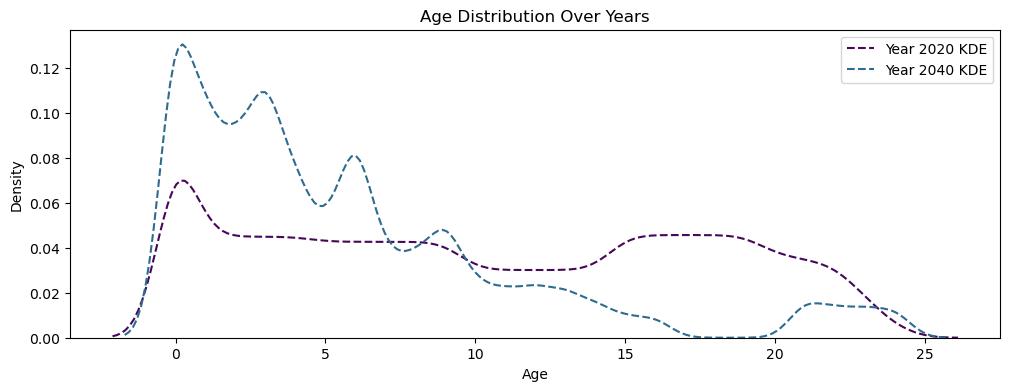

In [50]:
import scipy.stats as stats
import seaborn as sns

# determining technology share in each year + age strucuture
age_distribution_per_year = {}
ages = []
for y in range(y_init, Y_end + 1):
    total_veh_number = sum(h[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in odpair_list.keys() for tv_id in techvehicle_list.keys() if (y, r, tv_id, g) in h.keys())
    for g in range(g_init, y+1):
        curr_veh_nb = sum(h[(y, r, tv_id, g)] for r in odpair_list.keys() for tv_id in techvehicle_list.keys() if (y, r, tv_id, g) in h.keys())
        age = y - g
        if (y, age) in age_distribution_per_year.keys():
            age_distribution_per_year[(y, age)] += curr_veh_nb
        else:
            age_distribution_per_year[(y, age)] = curr_veh_nb
        ages.append(age)

for age in range(0, max(ages)):
    for y in range(y_init, Y_end + 1):
        if (y, age) not in age_distribution_per_year.keys():
            age_distribution_per_year[(y, age)] = 0
        print(y, age, age_distribution_per_year[(y, age)])

# Create a list of hex codes with different colors
print(age_distribution_per_year)
color_palette = sns.color_palette("viridis", 60).as_hex()
fig, ax = plt.subplots(figsize=(12, 4))
for y in range(y_init, Y_end + 1):
    if y in [2020, 2040, 2059]:
        # Create a DataFrame for the current year
        age_distribution_per_year[y] = {age: age_distribution_per_year[(y, age)] for age in range(0, max(ages)) if (y, age) in age_distribution_per_year.keys()}
        curr_distribution = age_distribution_per_year[y]

        df = pd.DataFrame(list(curr_distribution.items()), columns=["Age", "Count"])
        df = df.apply(pd.to_numeric, errors="coerce")  # Convert to numbers, set invalid to NaN
        df.dropna(inplace=True)  # Drop NaN values
        # Expand data by repeating ages according to their counts
        expanded_ages = np.repeat(df["Age"], df["Count"])

        # Fit a Normal Distribution
        mu, sigma = stats.norm.fit(expanded_ages)

        # Generate x values for PDF
        x = np.linspace(min(df["Age"]), max(df["Age"]), 100)
        pdf = stats.norm.pdf(x, mu, sigma)

        # Plot KDE & Normal Fit
        sns.kdeplot(expanded_ages, bw_adjust=1.5, label=f"Year {y} KDE", linestyle="dashed", color=color_palette[y - y_init])
        # plt.plot(x, pdf, label=f"Year {y} Fit (μ={mu:.1f}, σ={sigma:.1f})", color=color_palette[y - y_init])

# Formatting the plot
plt.title("Age Distribution Over Years")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()

plt.savefig(os.path.normpath(file_results + "/" + case_study_name + "_age_distribution.png"), transparent=True)
for y in range(y_init, Y_end + 1):
    for age in range(0, max(ages)):
        print(y, age, age_distribution_per_year[(y, age)])
    

2020 2050


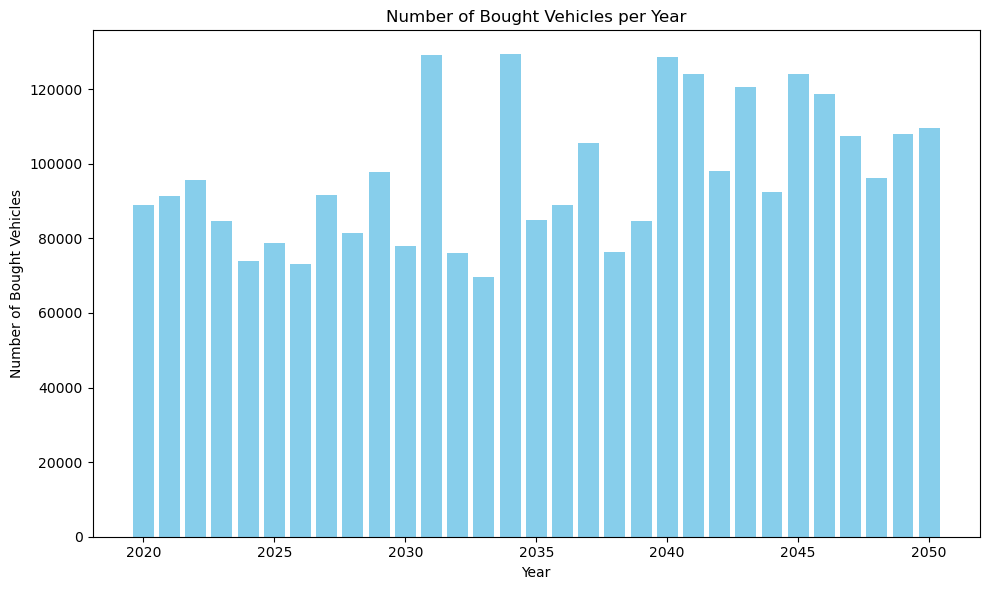

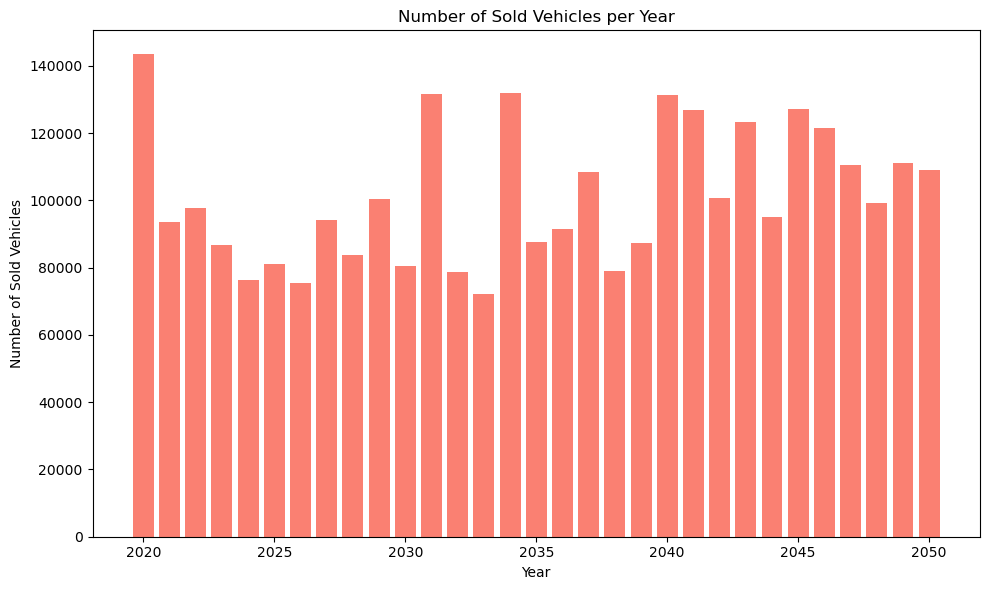

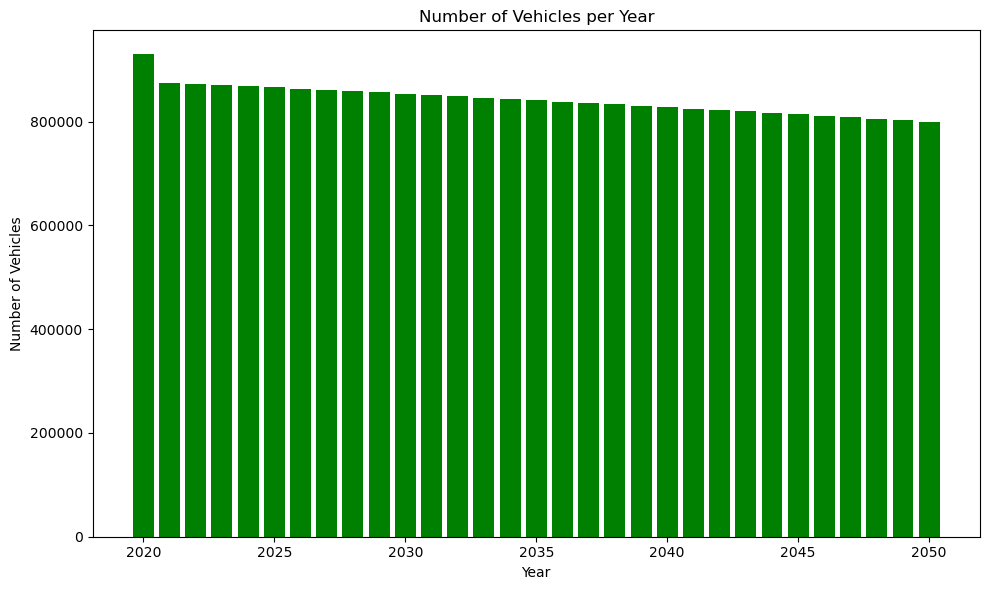

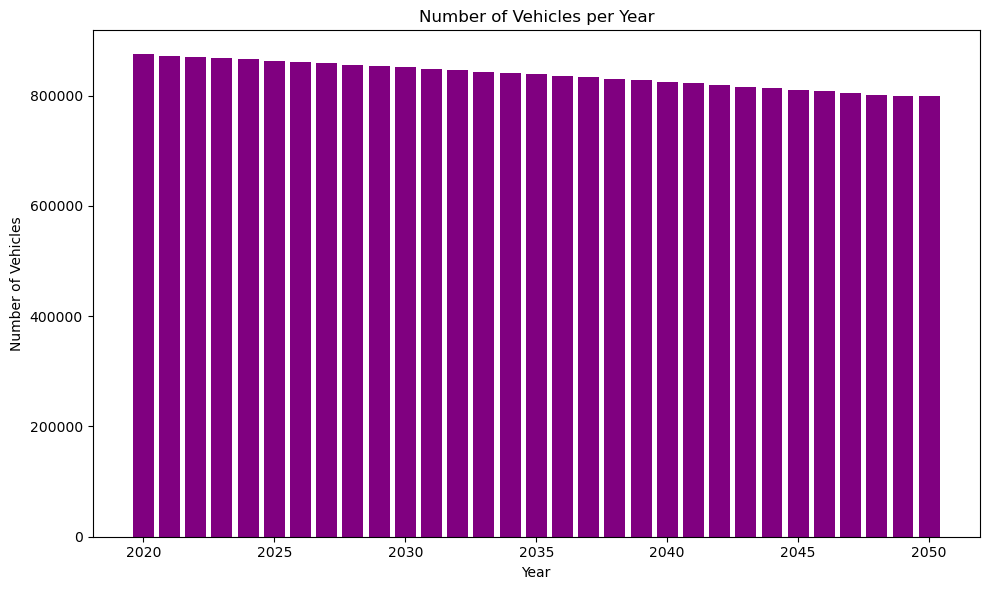

In [51]:
# ANALYSIS OF BOUGHT AND SOLD VEHICLES 
bought_vehicles = {}
exiting_vehicles = {}
h_now = {}
h_all = {}
print(y_init, Y_end)
for y in range(y_init, Y_end + 1):
    total_veh_number = sum(h_plus[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in odpair_list.keys() for tv_id in techvehicle_list.keys() if (y, r, tv_id, g) in h.keys())
    bought_vehicles[y] = total_veh_number
    total_veh_number = sum(h_minus[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in odpair_list.keys() for tv_id in techvehicle_list.keys() if (y, r, tv_id, g) in h.keys())
    exiting_vehicles[y] = total_veh_number
    total_veh_number = sum(h_exist[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in odpair_list.keys() for tv_id in techvehicle_list.keys() if (y, r, tv_id, g) in h.keys())
    h_now[y] = total_veh_number
    total_veh_number = sum(h[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in odpair_list.keys() for tv_id in techvehicle_list.keys() if (y, r, tv_id, g) in h.keys())
    h_all[y] = total_veh_number

fig, ax = plt.subplots(figsize=(10, 6))

years = range(y_init, Y_end + 1)
bought_values = [bought_vehicles[year] for year in years]

ax.bar(years, bought_values, color='skyblue')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Bought Vehicles')
ax.set_title('Number of Bought Vehicles per Year')

plt.tight_layout()
plt.show()

sold_values = [exiting_vehicles[year] for year in years]

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(years, sold_values, color='salmon')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Sold Vehicles')
ax.set_title('Number of Sold Vehicles per Year')

plt.tight_layout()
plt.show()

h_now_values = [h_now[year] for year in years]

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(years, h_now_values, color='green')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Vehicles')
ax.set_title('Number of Vehicles per Year')
plt.tight_layout()
plt.show()

h_all_values = [h_all[year] for year in years]

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(years, h_all_values, color='purple')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Vehicles')
ax.set_title('Number of Vehicles per Year')
plt.tight_layout()
plt.show()

2020 2050


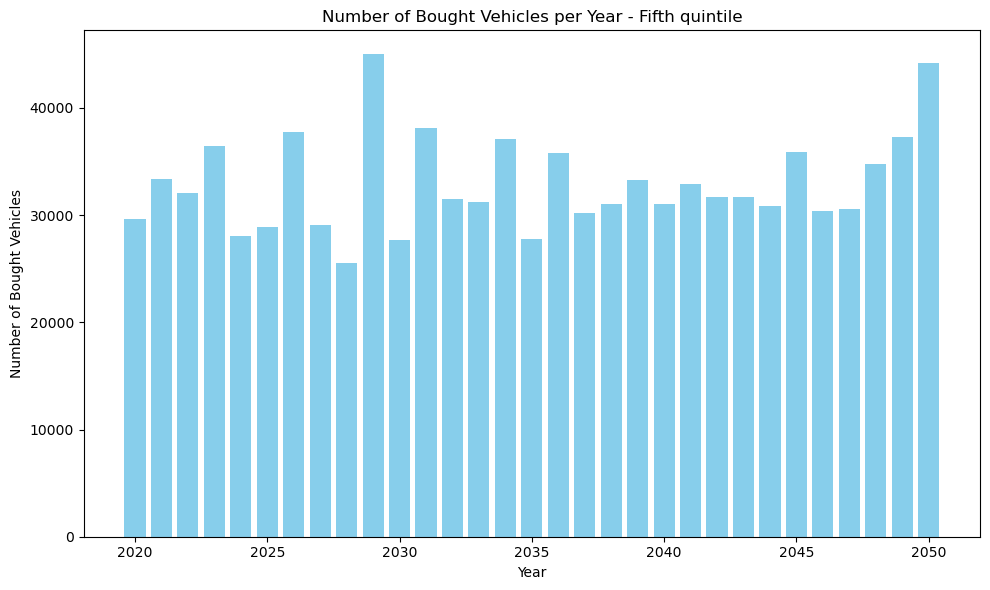

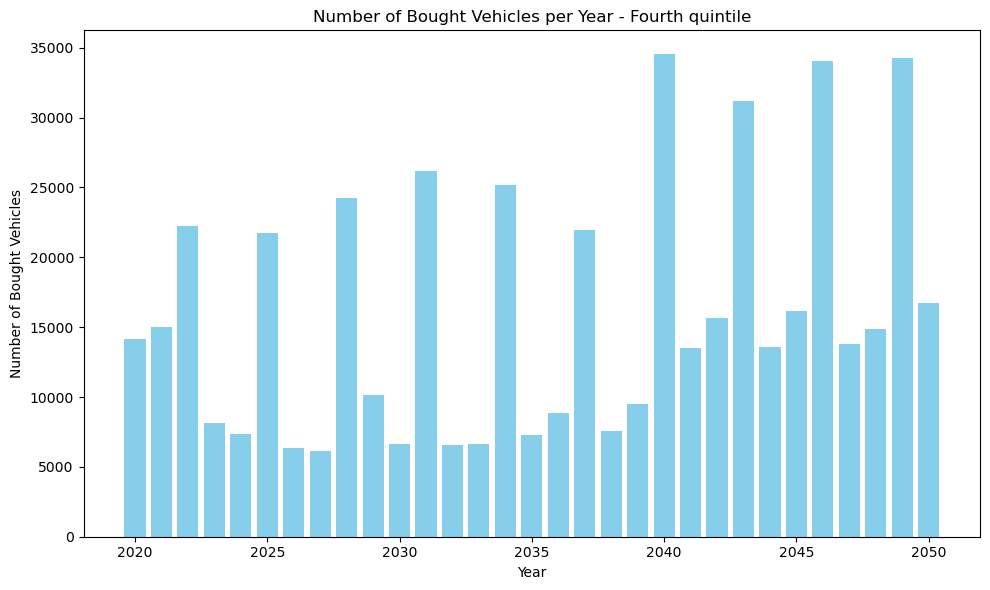

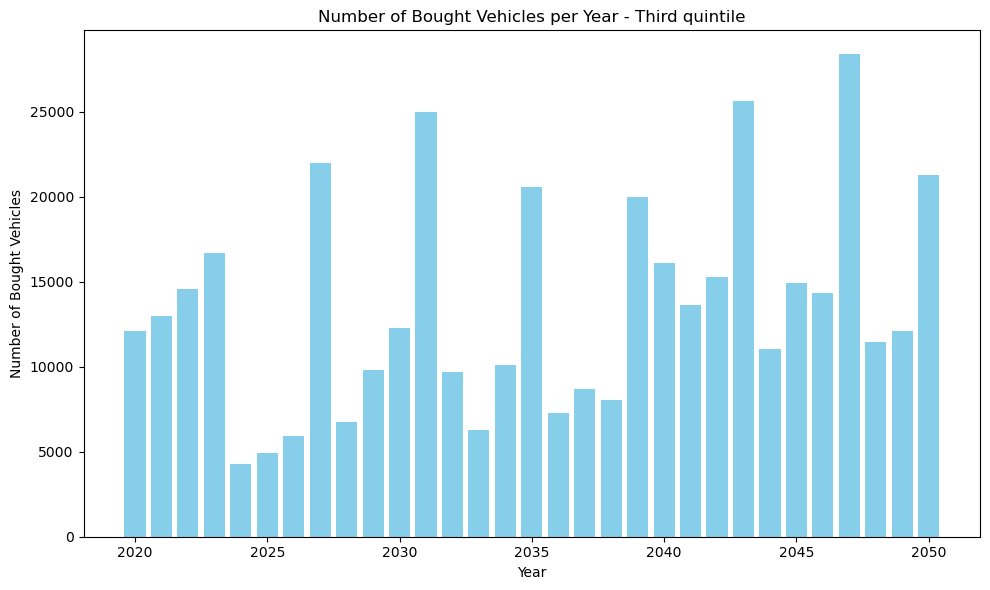

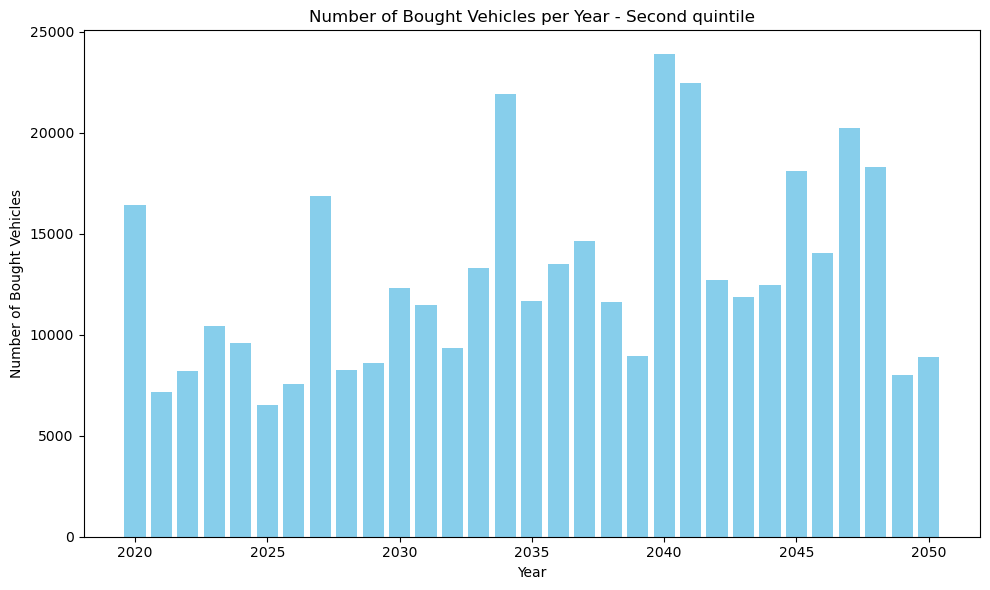

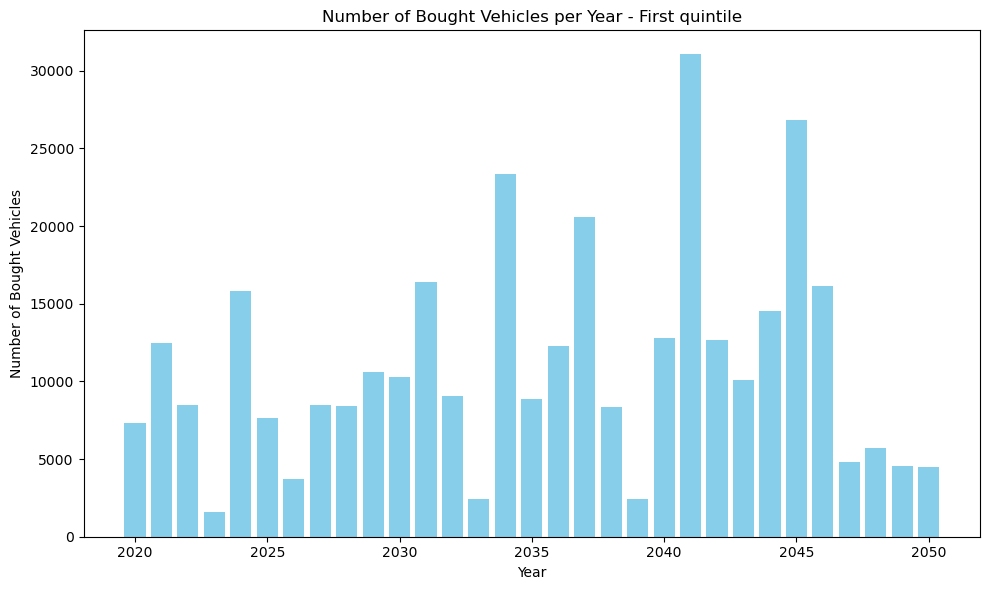

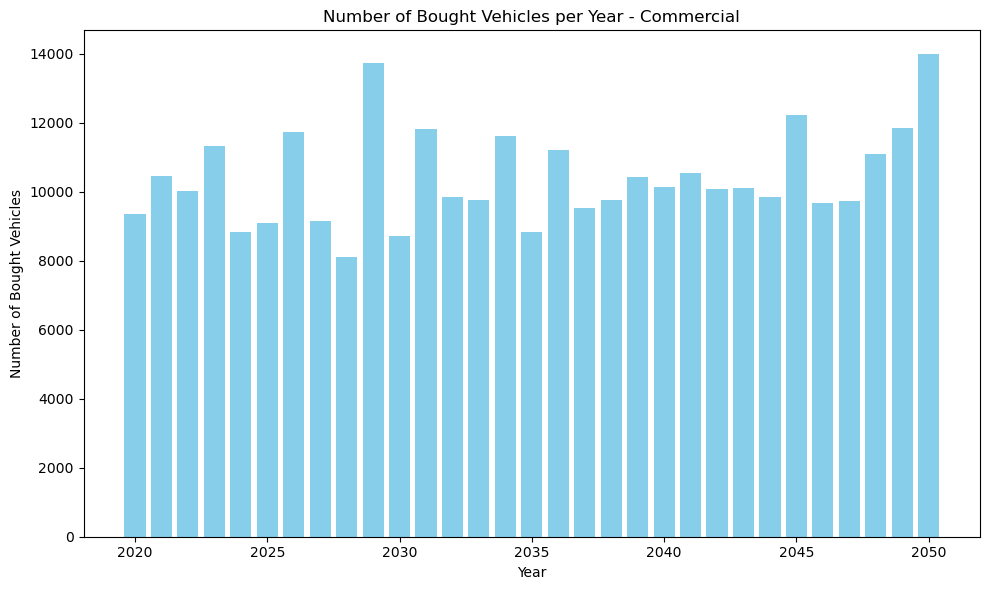

In [52]:
# purchases by income class
financial_status_list = input_data["FinancialStatus"]
financial_status_list = {item["id"]: item for item in financial_status_list}


print(y_init, Y_end)
for fin in financial_status_list.keys():
    bought_vehicles = {}
    exiting_vehicles = {}
    h_now = {}
    h_all = {}
    income_class = financial_status_list[fin]["name"]
    for y in range(y_init, Y_end + 1):
        total_veh_number = sum(h_plus[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in odpair_list.keys() for tv_id in techvehicle_list.keys() if odpair_list[r]["financial_status"] == income_class and (y, r, tv_id, g) in h.keys())
        bought_vehicles[y] = total_veh_number
        total_veh_number = sum(h_minus[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in odpair_list.keys() for tv_id in techvehicle_list.keys() if (y, r, tv_id, g) in h.keys())
        exiting_vehicles[y] = total_veh_number
        total_veh_number = sum(h_exist[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in odpair_list.keys() for tv_id in techvehicle_list.keys() if (y, r, tv_id, g) in h.keys())
        h_now[y] = total_veh_number
        total_veh_number = sum(h[(y, r, tv_id, g)] for g in range(g_init, y + 1) for r in odpair_list.keys() for tv_id in techvehicle_list.keys() if (y, r, tv_id, g) in h.keys())
        h_all[y] = total_veh_number

    fig, ax = plt.subplots(figsize=(10, 6))

    years = range(y_init, Y_end + 1)
    bought_values = [bought_vehicles[year] for year in years]

    ax.bar(years, bought_values, color='skyblue')
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Bought Vehicles')
    ax.set_title('Number of Bought Vehicles per Year - ' + income_class)

    plt.tight_layout()
    plt.savefig(os.path.normpath(file_results + "/" + case_study_name + "_bought_vehicles_" + income_class + ".png"), transparent=True)

In [53]:
tech_vehicle_names = [techvehicle_list[tech_id]["name"] for tech_id in techvehicle_list.keys()]

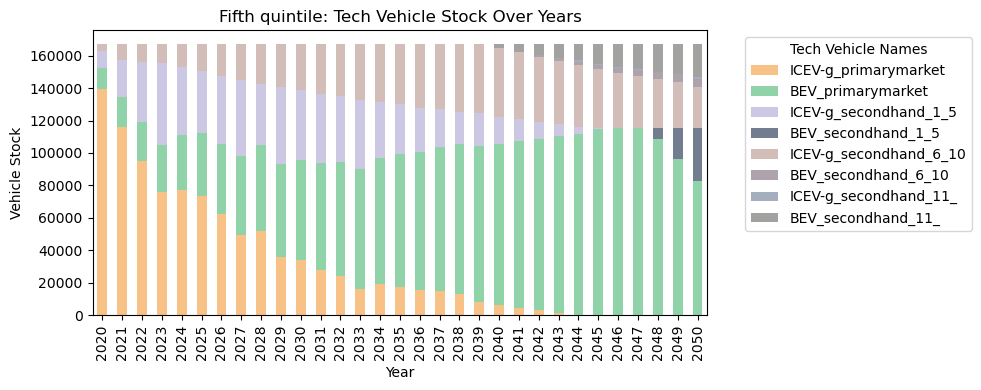

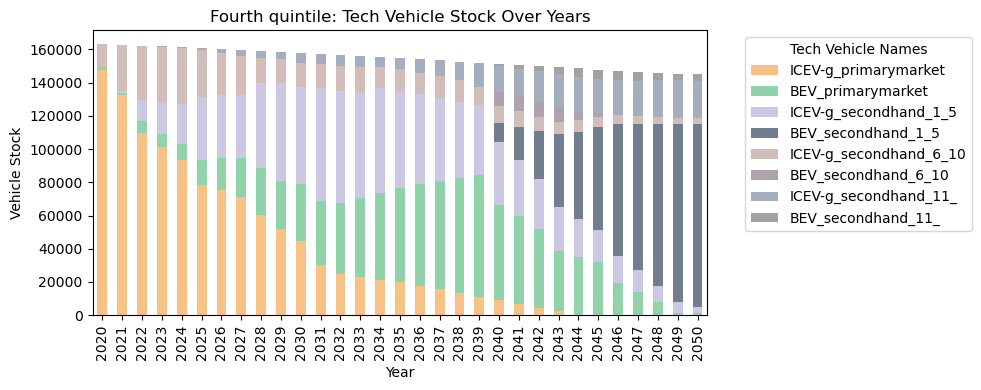

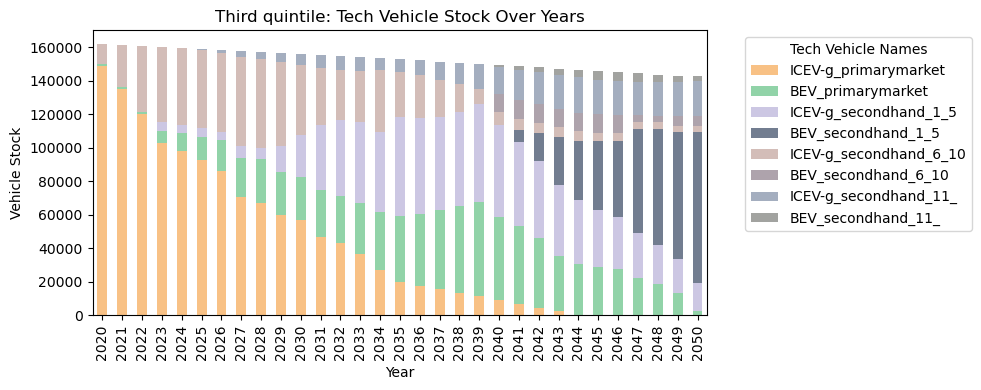

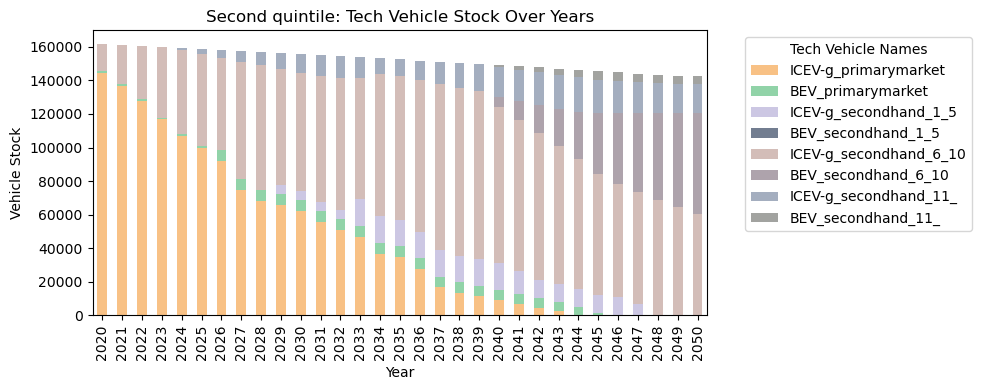

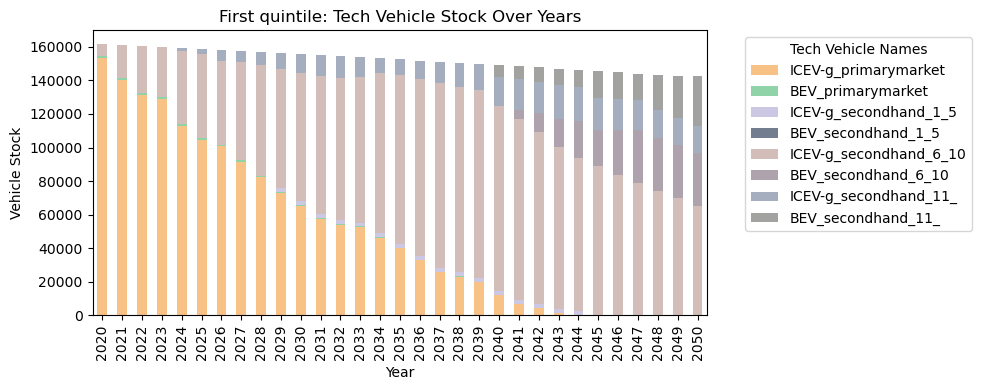

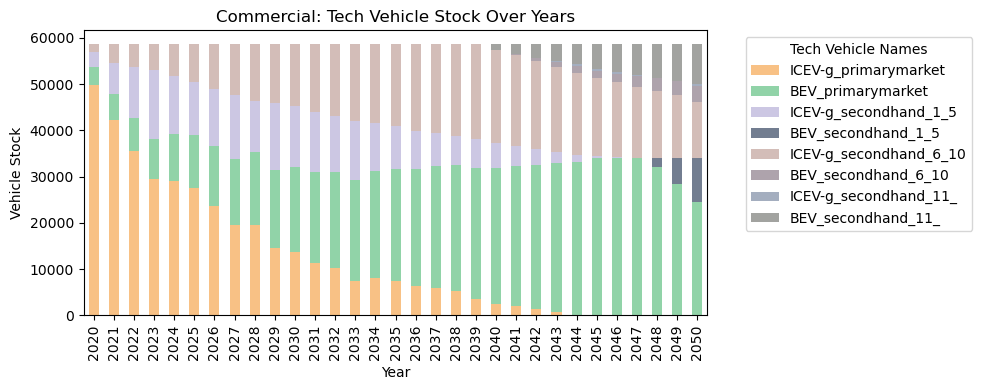

In [54]:
financial_status_list = input_data["FinancialStatus"]
financial_status_list = {item["id"]: item for item in financial_status_list}
for fin in financial_status_list.keys():
    tech_vehicle_names = [techvehicle_list[tech_id]["name"] for tech_id in techvehicle_list.keys()]
    fig, ax = plt.subplots(figsize=(10, 4))

    years = range(y_init, Y_end + 1)
    tech_ids = list(techvehicle_list.keys())

    techveh_stock_all = get_vehicle_stock(by_income_class=True, income_class=financial_status_list[fin]["name"])

    # Prepare data for stacked bar plot
    
    data = {year: [techveh_stock_all.get((year, tech_id), 0) for tech_id in tech_ids] for year in years}
    df = pd.DataFrame(data, index=tech_ids).T

    # Plotting
    bars = df.plot(kind='bar', stacked=True, ax=ax, color=colors_techvehicles, alpha=0.8)
    ax.set_xlabel('Year')
    ax.set_ylabel('Vehicle Stock')
    ax.set_title(financial_status_list[fin]["name"]+ ': Tech Vehicle Stock Over Years')
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles, tech_vehicle_names, title='Tech Vehicle Names', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.savefig(os.path.normpath(file_results + "/" + case_study_name + "_tech_vehicle_stock_" + financial_status_list[fin]["name"] + ".png"), transparent=True)


{(2041, 64): 0.0, (2032, 20): 0.0, (2025, 157): 0.0, (2046, 21): 0.0, (2048, 43): 0.0, (2031, 57): 0.0, (2036, 13): 0.0, (2029, 105): 0.0, (2050, 94): 833176.782555, (2037, 89): 0.0, (2027, 159): 0.0, (2050, 122): 0.0, (2038, 125): 0.0, (2040, 81): 0.0, (2046, 13): 0.0, (2026, 113): 0.0, (2044, 57): 0.0, (2024, 26): 0.0, (2039, 23): 0.0, (2041, 131): 0.0, (2046, 132): 0.0, (2038, 89): 0.0, (2033, 86): 0.0, (2035, 101): 0.0, (2050, 151): 0.0, (2039, 43): 0.0, (2046, 46): 0.0, (2041, 129): 0.0, (2026, 81): 0.0, (2050, 159): 0.0, (2030, 37): 0.0, (2033, 158): 0.0, (2049, 29): 0.0, (2046, 53): 0.0, (2025, 70): 0.0, (2027, 156): 0.0, (2031, 73): 0.0, (2048, 152): 0.0, (2035, 131): 0.0, (2050, 114): 0.0, (2044, 97): 0.0, (2029, 100): 0.0, (2042, 155): 0.0, (2033, 113): 0.0, (2042, 18): 0.0, (2041, 76): 0.0, (2022, 6): 0.0, (2025, 156): 0.0, (2031, 99): 0.0, (2045, 40): 0.0, (2046, 64): 0.0, (2025, 20): 0.0, (2031, 100): 0.0, (2028, 17): 0.0, (2030, 36): 0.0, (2041, 134): 0.0, (2022, 144): 0.

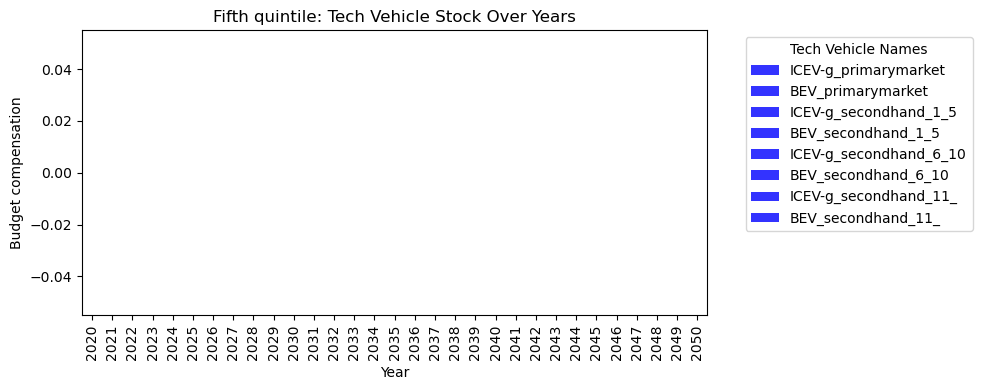

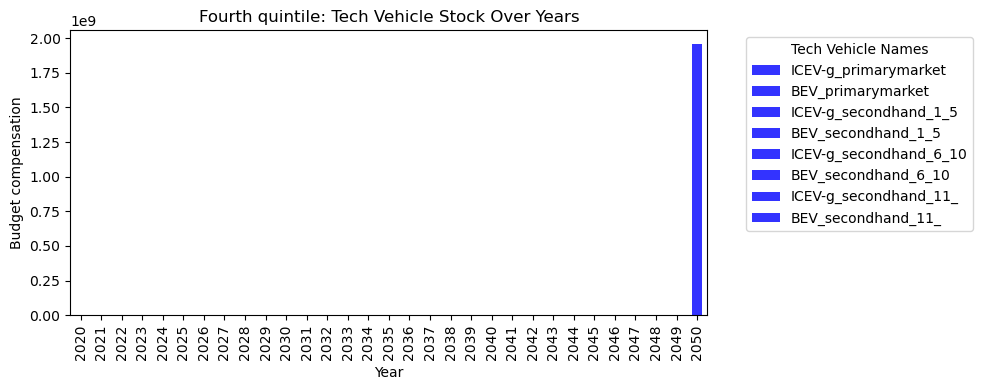

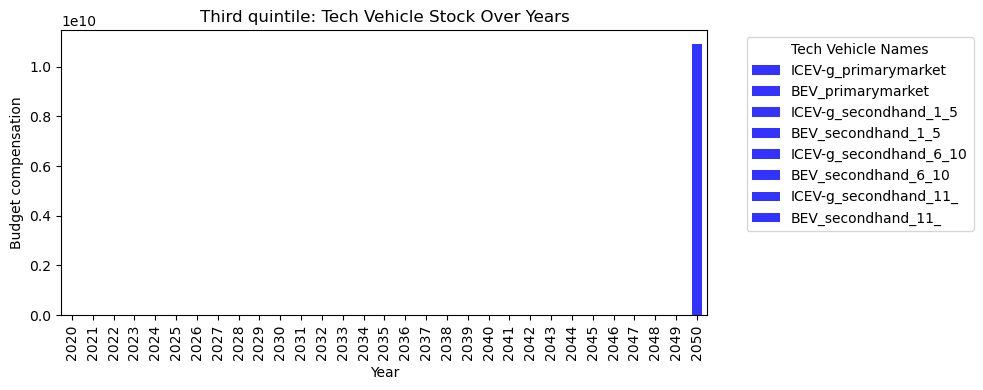

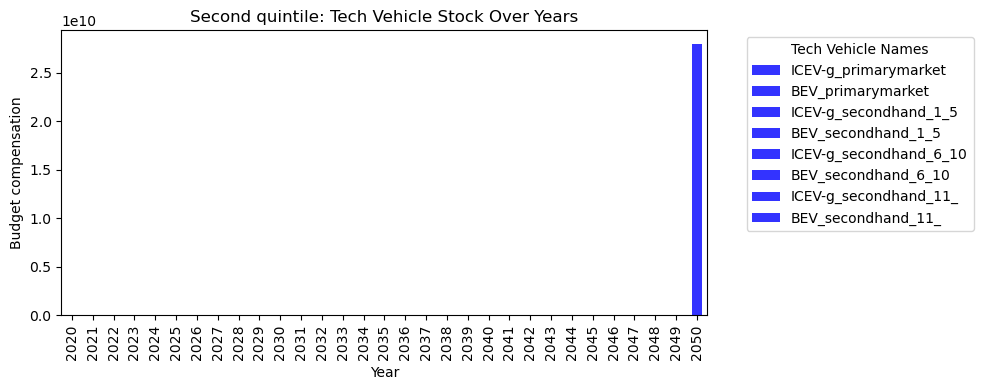

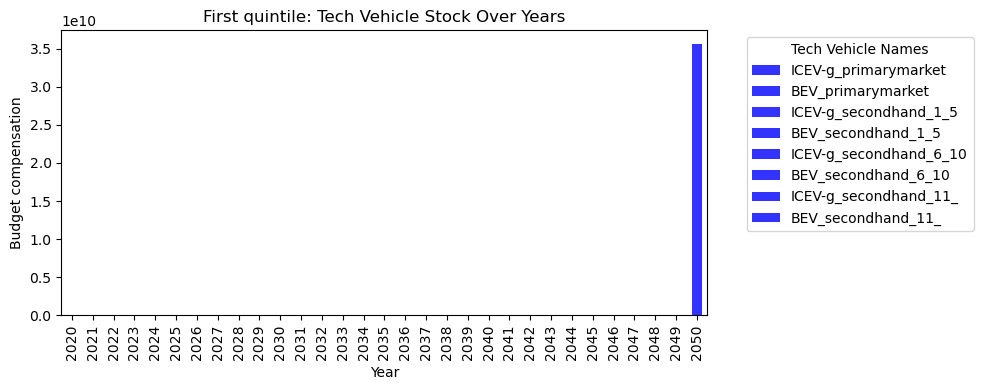

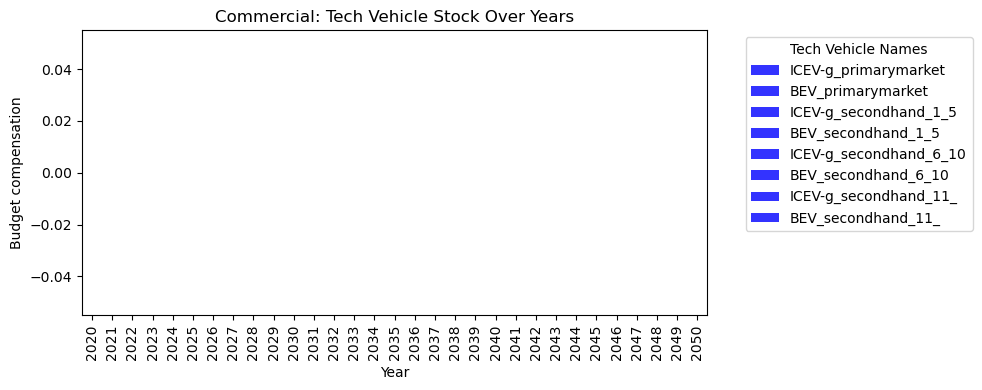

In [55]:
# looking a budget penalties
def get_budget_penalty_total(by_income_class = False, income_class=None):
    budget_pen = {}

    # for tv_id in techvehicle_list:

    for y in range(y_init, Y_end + 1):
        if not by_income_class:
            total_budget_nb_plus = sum(budget_penalty_plus[(y, r)] for g in range(g_init, y + 1) for r in odpair_list.keys() if (y, r) in budget_penalty_plus.keys())
            total_budget_nb_minus = sum(budget_penalty_minus[(y, r)] for g in range(g_init, y + 1) for r in odpair_list.keys() if (y, r) in budget_penalty_minus.keys())
        else:
            total_budget_nb_plus = sum(budget_penalty_plus[(y, r)] for g in range(g_init, y + 1) for r in odpair_list.keys() if odpair_list[r]["financial_status"] == income_class and (y, r) in budget_penalty_plus.keys())
            total_budget_nb_minus = sum(budget_penalty_minus[(y, r)] for g in range(g_init, y + 1) for r in odpair_list.keys() if odpair_list[r]["financial_status"] == income_class and (y, r) in budget_penalty_minus.keys())
        budget_pen[(y)] = total_budget_nb_plus + total_budget_nb_minus
    return budget_pen

financial_status_list = input_data["FinancialStatus"]
financial_status_list = {item["id"]: item for item in financial_status_list}
for fin in financial_status_list.keys():
    tech_vehicle_names = [techvehicle_list[tech_id]["name"] for tech_id in techvehicle_list.keys()]
    fig, ax = plt.subplots(figsize=(10, 4))

    years = range(y_init, Y_end + 1)
    tech_ids = list(techvehicle_list.keys())

    techveh_stock_all = get_budget_penalty_total(by_income_class=True, income_class=financial_status_list[fin]["name"])

    # Prepare data for stacked bar plot
    
    data = {year: [techveh_stock_all.get((year))]for year in years}
    df = pd.DataFrame(data, index=tech_ids).T

    # Plotting
    bars = df.plot(kind='bar', stacked=True, ax=ax, color="blue", alpha=0.8)
    ax.set_xlabel('Year')
    ax.set_ylabel('Budget compensation')
    ax.set_title(financial_status_list[fin]["name"]+ ': Tech Vehicle Stock Over Years')
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles, tech_vehicle_names, title='Tech Vehicle Names', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.savefig(os.path.normpath(file_results + "/" + case_study_name + "_tech_vehicle_stock_" + financial_status_list[fin]["name"] + ".png"), transparent=True)
print(budget_penalty_plus)

{(2041, 64): 0.0, (2032, 20): 0.0, (2025, 157): 0.0, (2046, 21): 0.0, (2048, 43): 0.0, (2031, 57): 0.0, (2036, 13): 0.0, (2029, 105): 0.0, (2050, 94): 833176.782555, (2037, 89): 0.0, (2027, 159): 0.0, (2050, 122): 0.0, (2038, 125): 0.0, (2040, 81): 0.0, (2046, 13): 0.0, (2026, 113): 0.0, (2044, 57): 0.0, (2024, 26): 0.0, (2039, 23): 0.0, (2041, 131): 0.0, (2046, 132): 0.0, (2038, 89): 0.0, (2033, 86): 0.0, (2035, 101): 0.0, (2050, 151): 0.0, (2039, 43): 0.0, (2046, 46): 0.0, (2041, 129): 0.0, (2026, 81): 0.0, (2050, 159): 0.0, (2030, 37): 0.0, (2033, 158): 0.0, (2049, 29): 0.0, (2046, 53): 0.0, (2025, 70): 0.0, (2027, 156): 0.0, (2031, 73): 0.0, (2048, 152): 0.0, (2035, 131): 0.0, (2050, 114): 0.0, (2044, 97): 0.0, (2029, 100): 0.0, (2042, 155): 0.0, (2033, 113): 0.0, (2042, 18): 0.0, (2041, 76): 0.0, (2022, 6): 0.0, (2025, 156): 0.0, (2031, 99): 0.0, (2045, 40): 0.0, (2046, 64): 0.0, (2025, 20): 0.0, (2031, 100): 0.0, (2028, 17): 0.0, (2030, 36): 0.0, (2041, 134): 0.0, (2022, 144): 0.

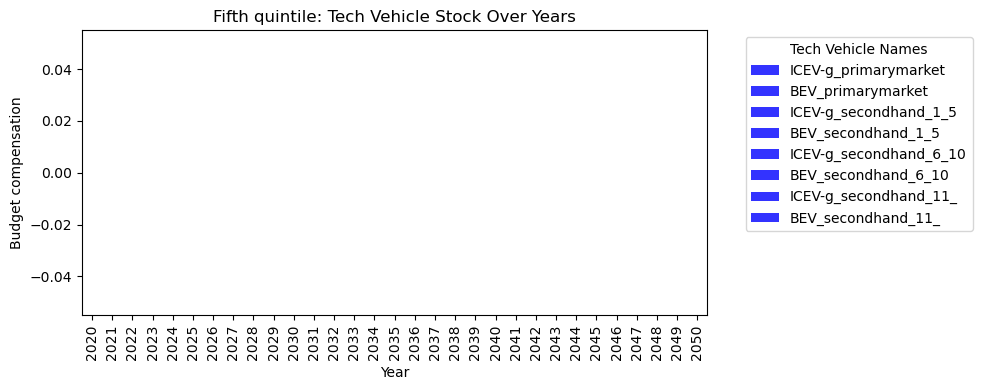

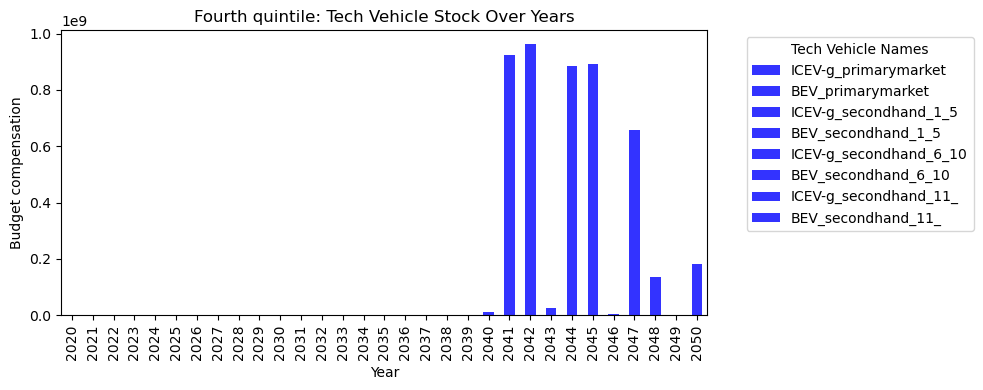

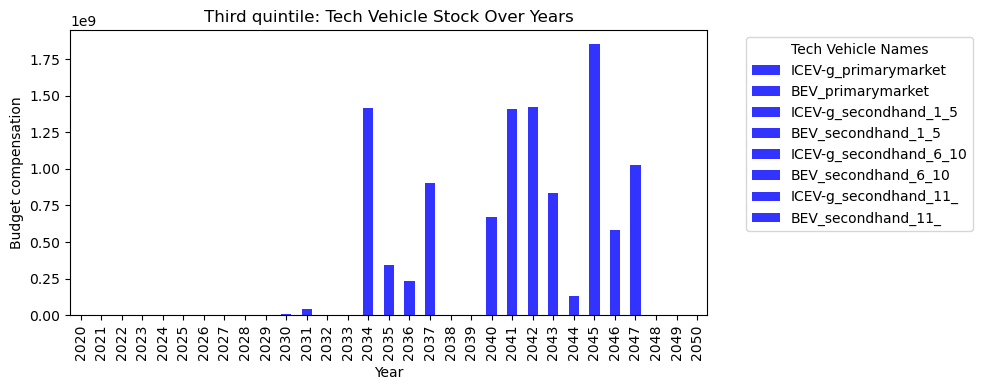

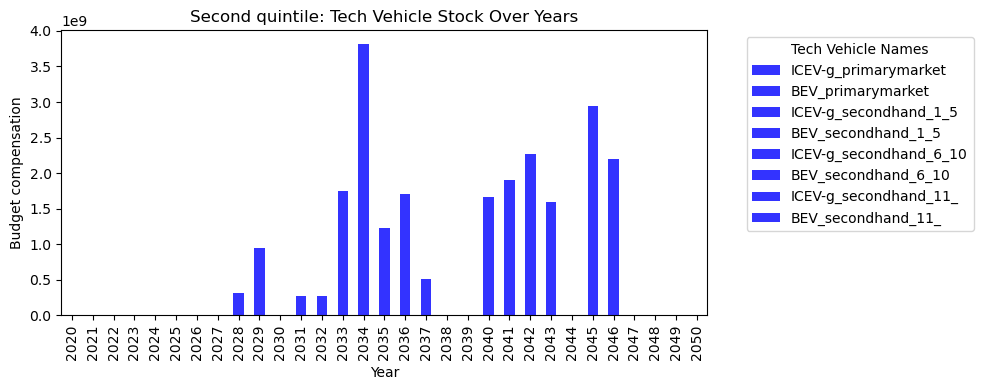

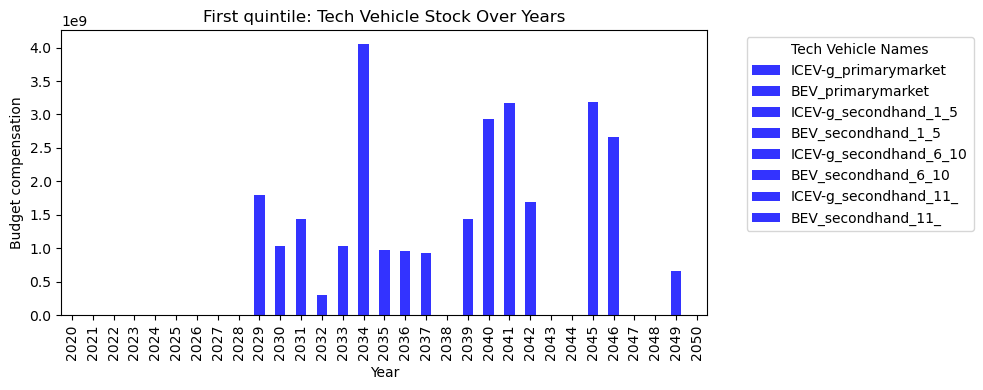

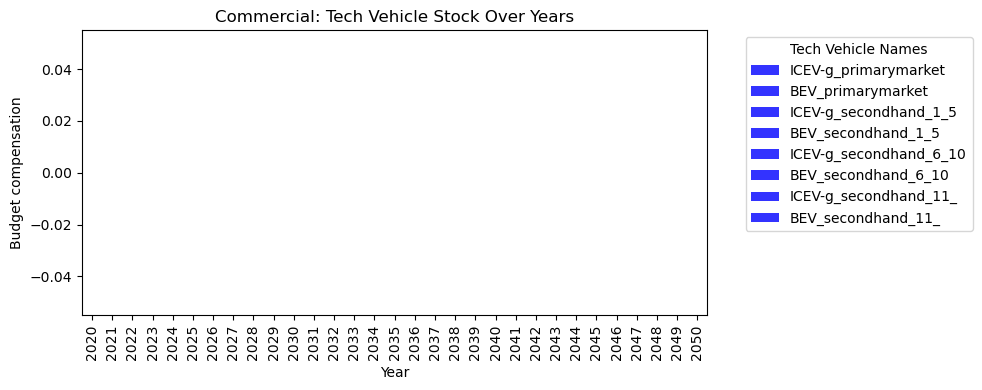

In [56]:
# looking a budget penalties
def get_budget_penalty_total_yearly(by_income_class = False, income_class=None):
    budget_pen = {}

    # for tv_id in techvehicle_list:

    for y in range(y_init, Y_end + 1):
        if not by_income_class:
            total_budget_nb_plus = sum(budget_penalty_plus_yearly[(y, r)] for g in range(g_init, y + 1) for r in odpair_list.keys() if (y, r) in budget_penalty_plus.keys())
            total_budget_nb_minus = sum(budget_penalty_minus_yearly[(y, r)] for g in range(g_init, y + 1) for r in odpair_list.keys() if (y, r) in budget_penalty_minus.keys())
        else:
            total_budget_nb_plus = sum(budget_penalty_plus_yearly[(y, r)] for g in range(g_init, y + 1) for r in odpair_list.keys() if odpair_list[r]["financial_status"] == income_class and (y, r) in budget_penalty_plus.keys())
            total_budget_nb_minus = sum(budget_penalty_minus_yearly[(y, r)] for g in range(g_init, y + 1) for r in odpair_list.keys() if odpair_list[r]["financial_status"] == income_class and (y, r) in budget_penalty_minus.keys())
        budget_pen[(y)] = total_budget_nb_plus + total_budget_nb_minus
    return budget_pen

financial_status_list = input_data["FinancialStatus"]
financial_status_list = {item["id"]: item for item in financial_status_list}
for fin in financial_status_list.keys():
    tech_vehicle_names = [techvehicle_list[tech_id]["name"] for tech_id in techvehicle_list.keys()]
    fig, ax = plt.subplots(figsize=(10, 4))

    years = range(y_init, Y_end + 1)
    tech_ids = list(techvehicle_list.keys())

    techveh_stock_all = get_budget_penalty_total_yearly(by_income_class=True, income_class=financial_status_list[fin]["name"])

    # Prepare data for stacked bar plot
    
    data = {year: [techveh_stock_all.get((year))]for year in years}
    df = pd.DataFrame(data, index=tech_ids).T

    # Plotting
    bars = df.plot(kind='bar', stacked=True, ax=ax, color="blue", alpha=0.8)
    ax.set_xlabel('Year')
    ax.set_ylabel('Budget compensation')
    ax.set_title(financial_status_list[fin]["name"]+ ': Tech Vehicle Stock Over Years')
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles, tech_vehicle_names, title='Tech Vehicle Names', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.savefig(os.path.normpath(file_results + "/" + case_study_name + "_tech_vehicle_stock_" + financial_status_list[fin]["name"] + ".png"), transparent=True)
print(budget_penalty_plus)

## Fueling infrastructure investments

In [57]:
technology_list = input_data["Technology"]
technology_list = {item["id"]: item for item in technology_list}
geographic_element_list = input_data["GeographicElement"]
geographic_element_list = {item["id"]: item for item in geographic_element_list}

fuel_list = input_data["Fuel"]
fuel_list = {item["id"]: item for item in fuel_list}

def get_fuel_infr_plus(by_geographic_element = False, geographic_element=[]):
    q_plus_by_tech = {}

    if not by_geographic_element:
        geographic_element = geographic_element_list.keys()
    
    for f in fuel_list.keys():
        for y in range(y_init, Y_end + 1):
            total_expansion_per_y = sum(q_fuel_infr_plus[(y0, f, e)] for y0 in range(y_init, y+1) for e in geographic_element if (y0, f, e) in q_fuel_infr_plus.keys())
            q_plus_by_tech[(y, f)] = total_expansion_per_y
    return q_plus_by_tech

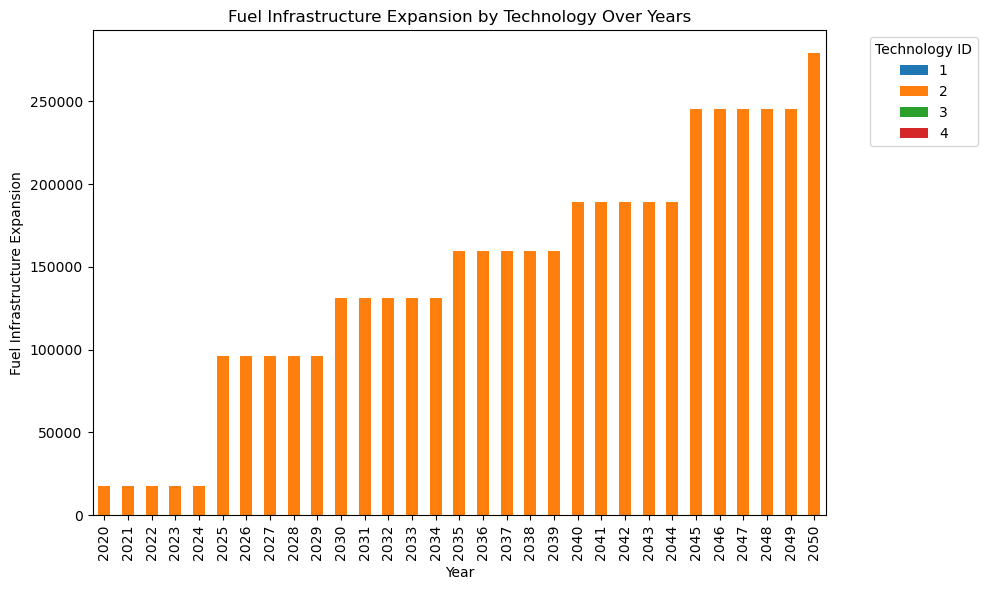

In [58]:
q_plus_by_tech = get_fuel_infr_plus()

fig, ax = plt.subplots(figsize=(10, 6))

years = range(y_init, Y_end + 1)
tech_ids = list(technology_list.keys())

# Prepare data for stacked bar plot
data = {year: [q_plus_by_tech.get((year, tech_id), 0) for tech_id in tech_ids] for year in years}
df = pd.DataFrame(data, index=tech_ids).T

# Plotting
df.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Fuel Infrastructure Expansion')
ax.set_title('Fuel Infrastructure Expansion by Technology Over Years')
plt.legend(title='Technology ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

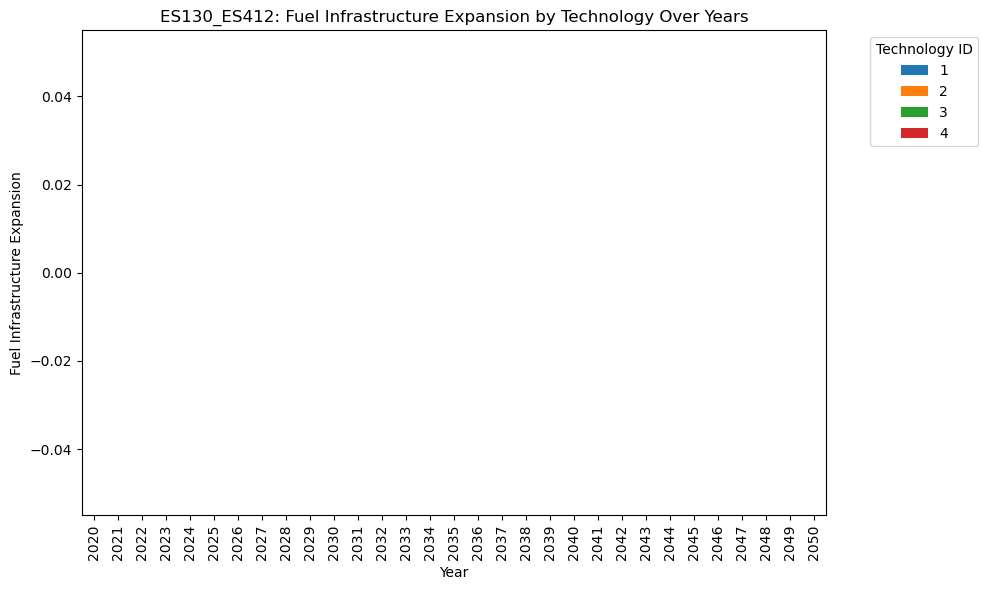

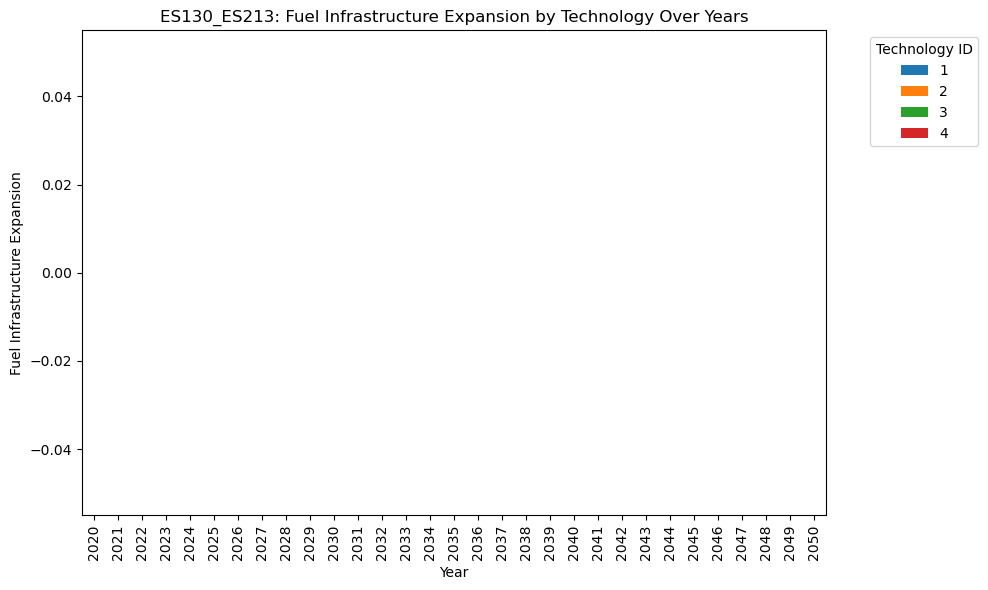

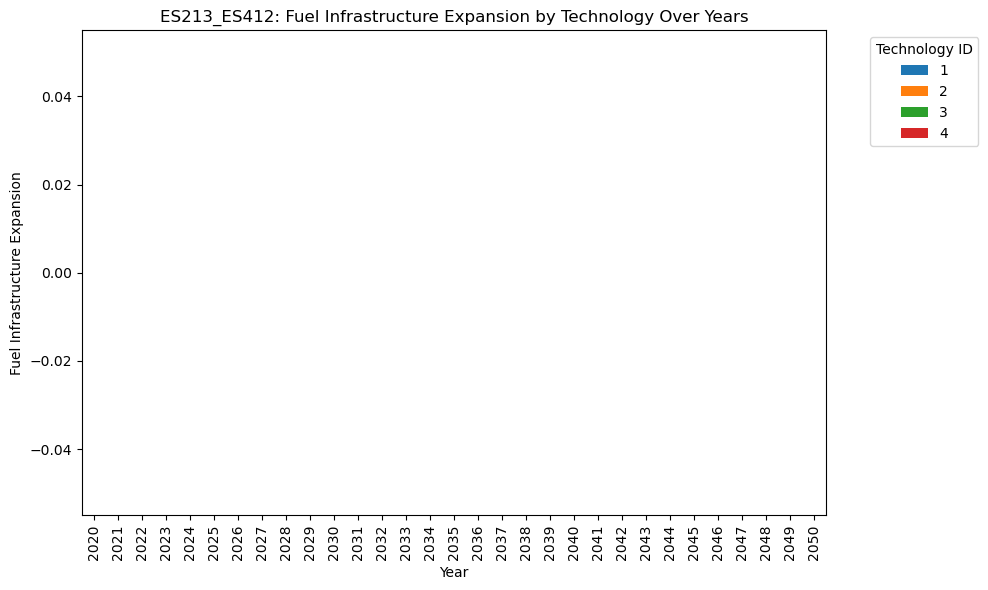

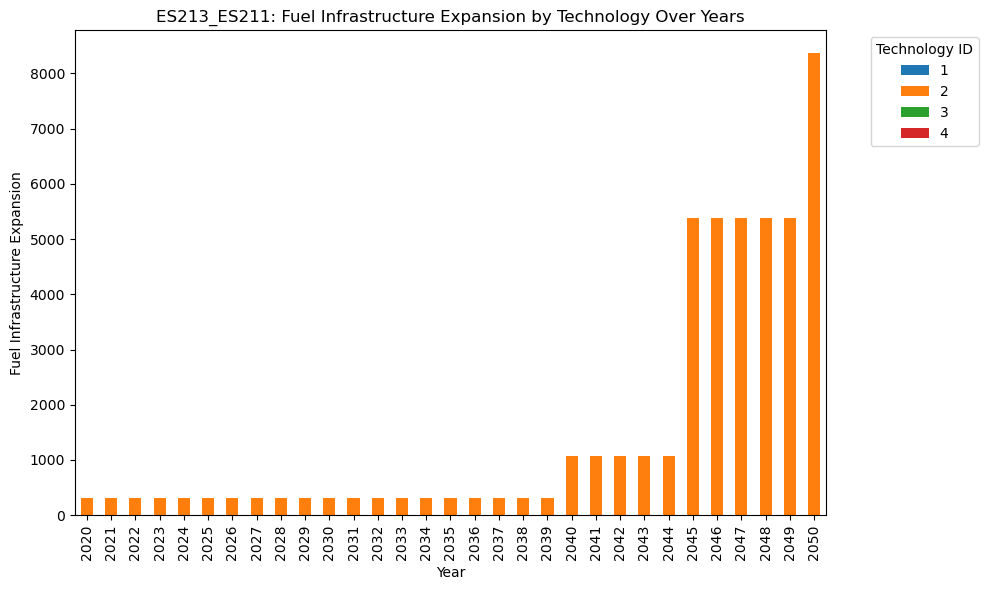

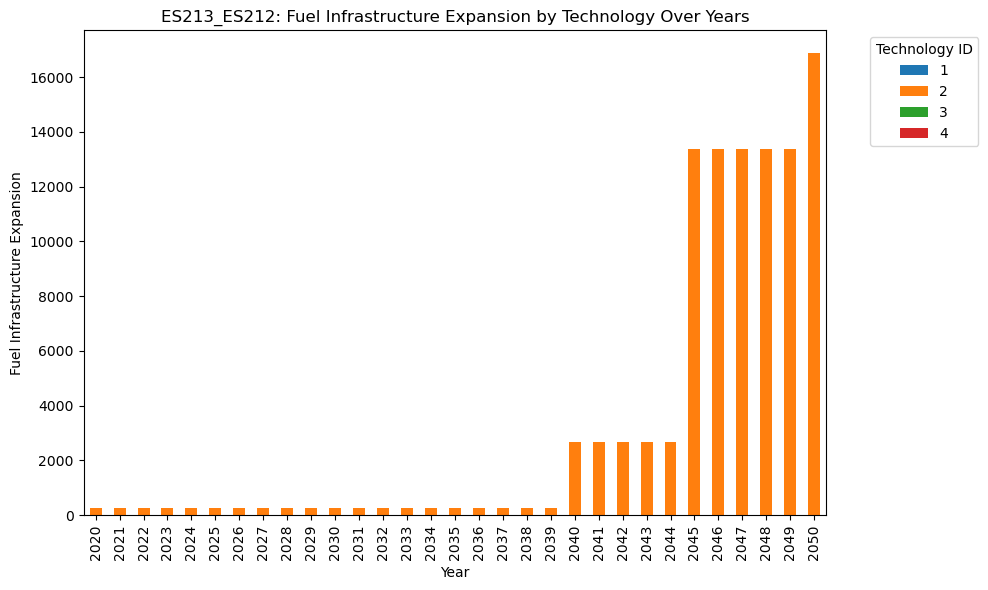

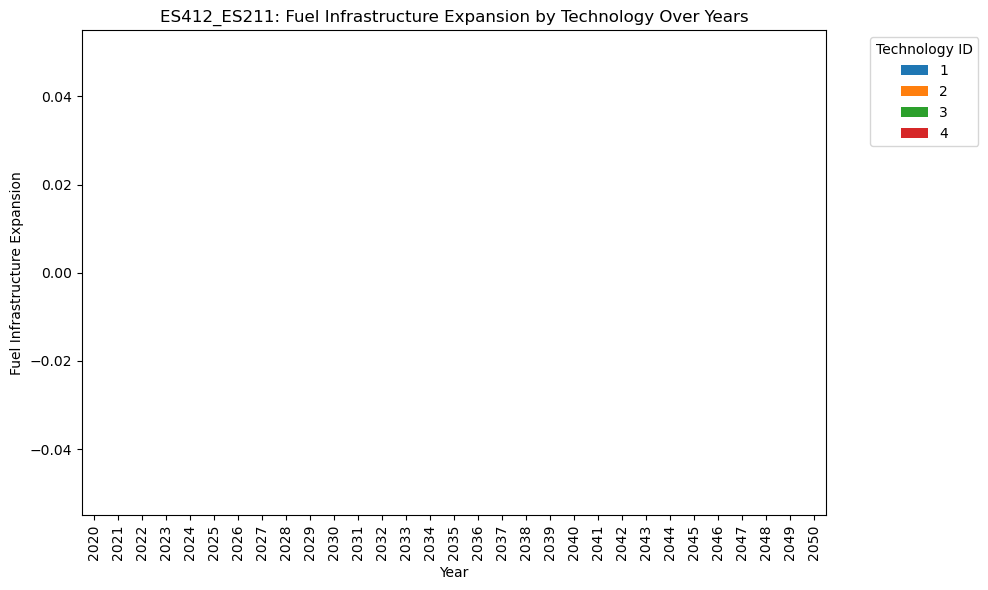

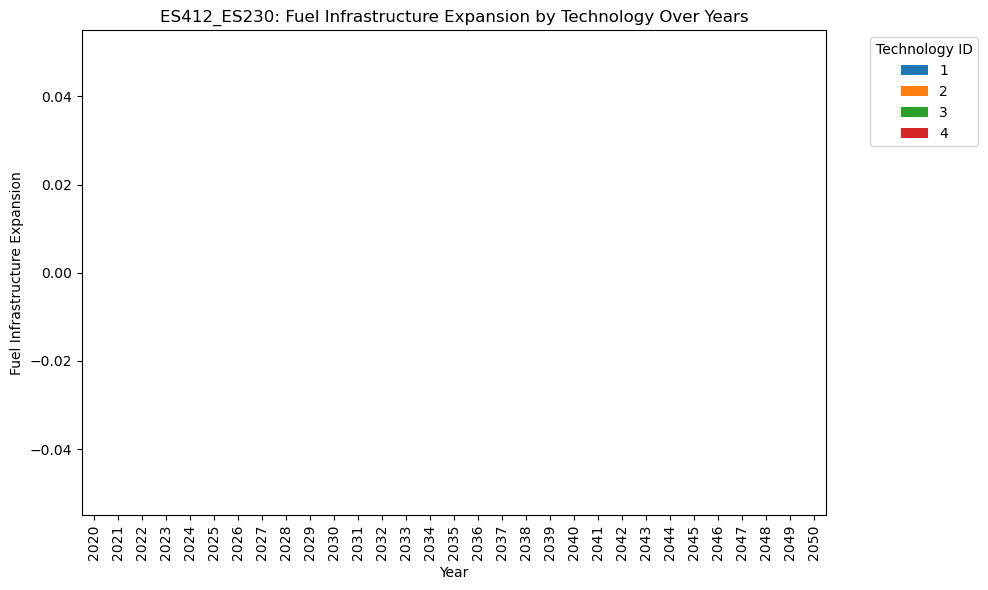

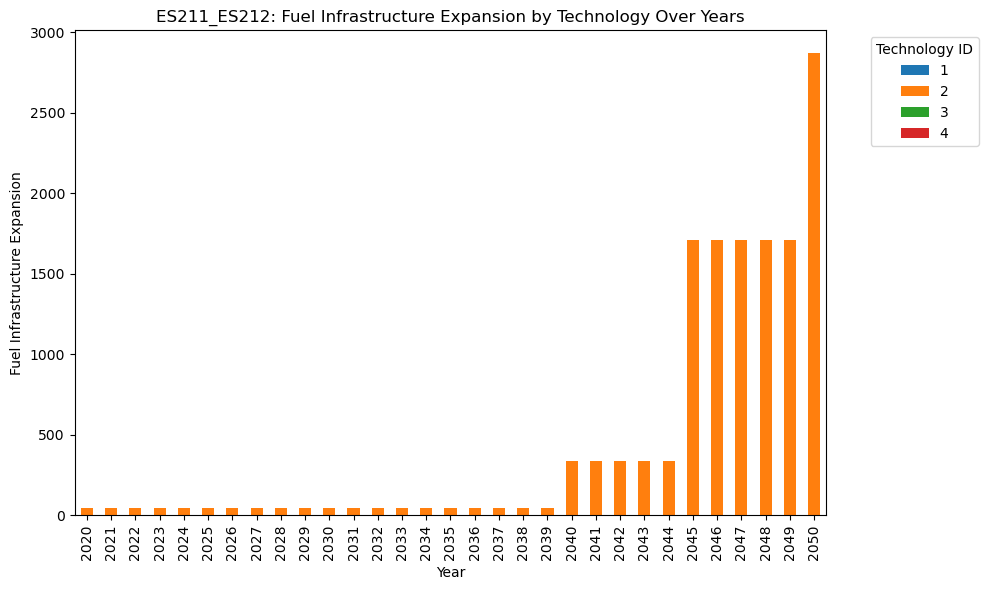

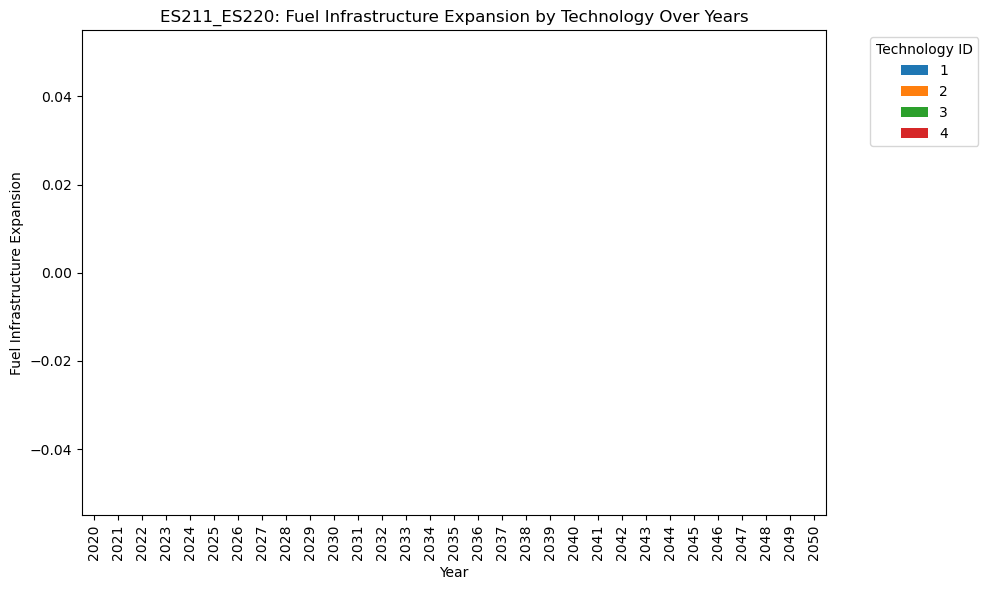

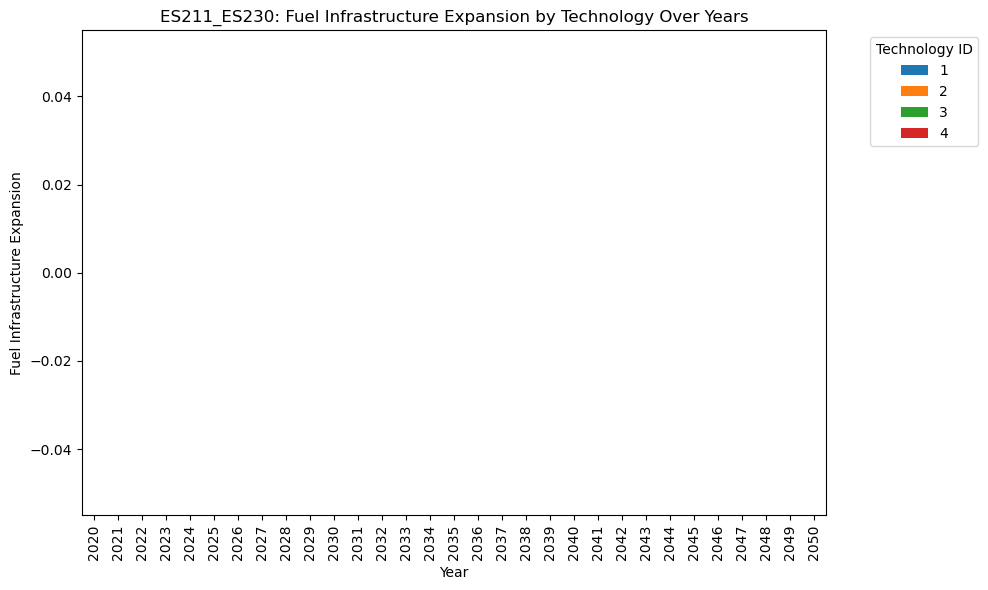

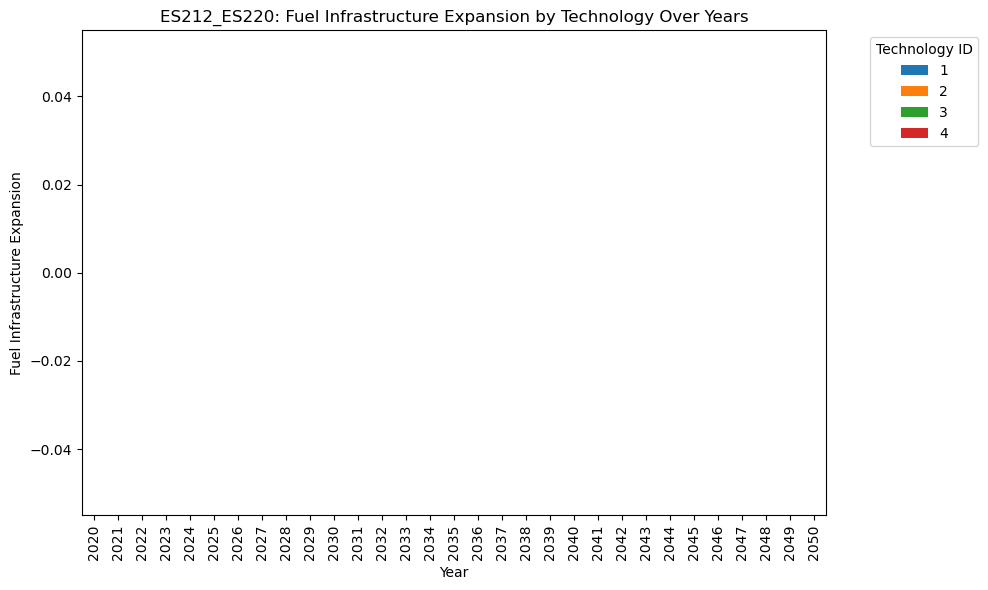

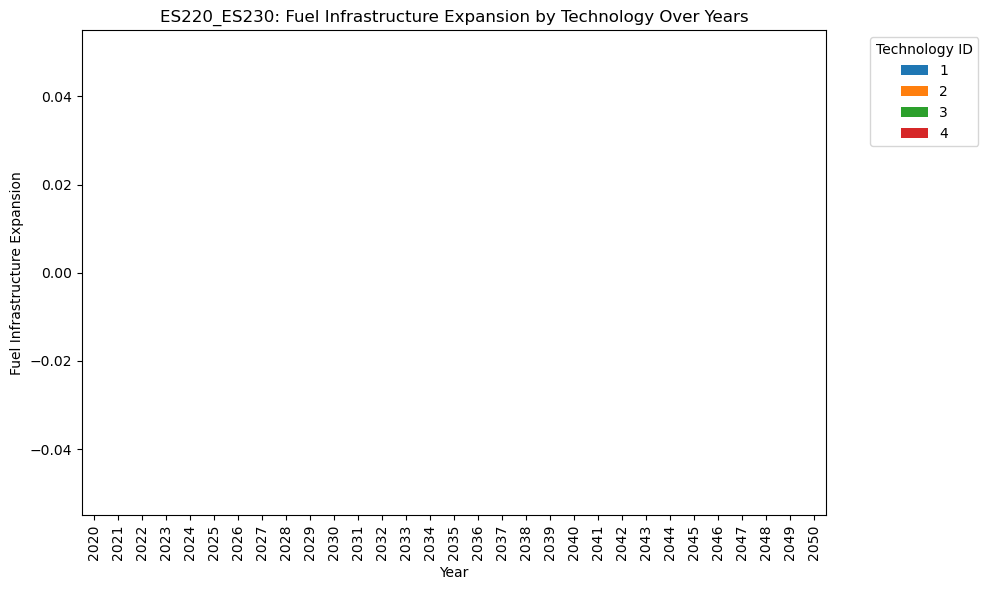

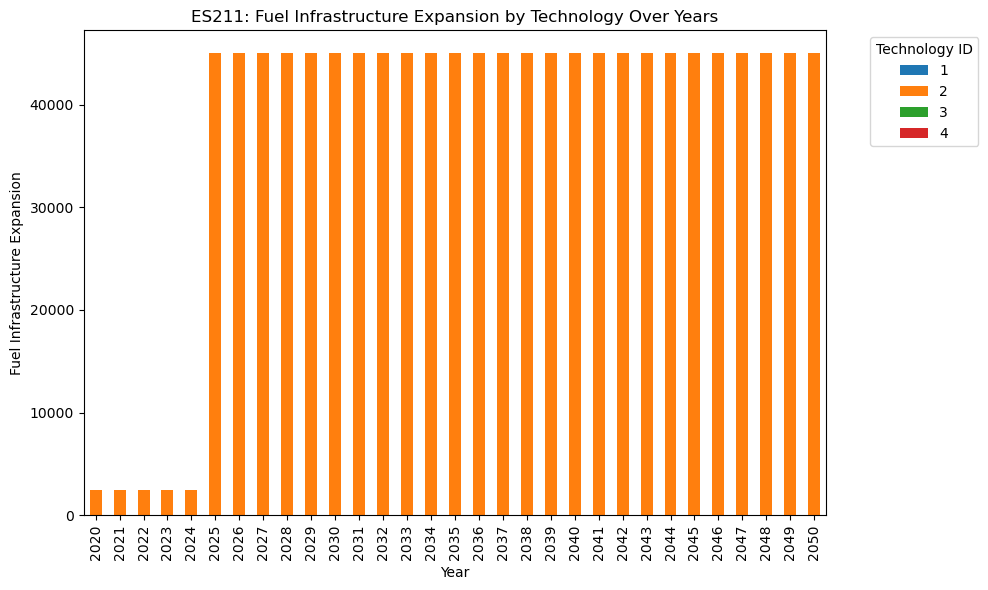

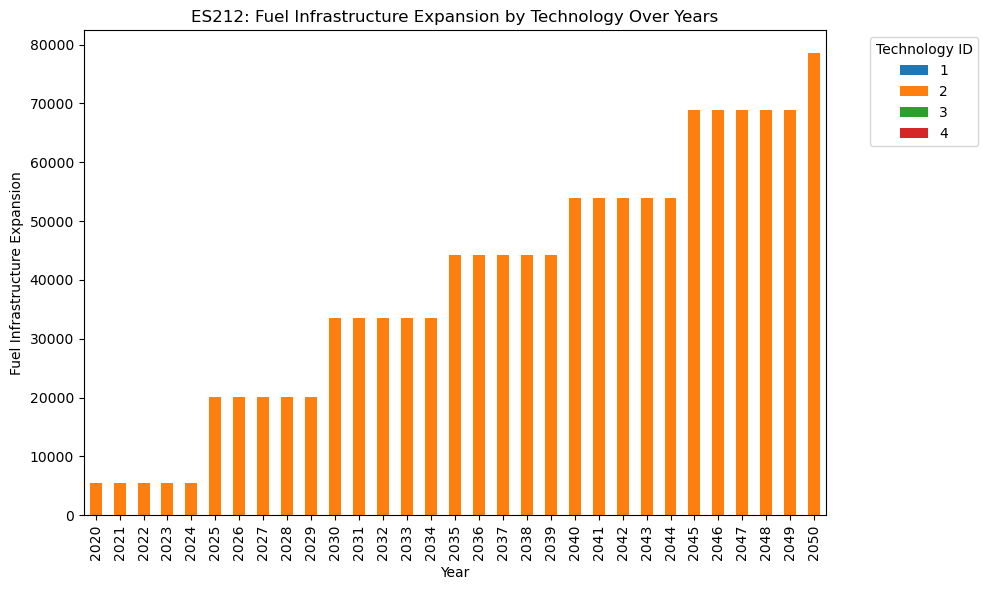

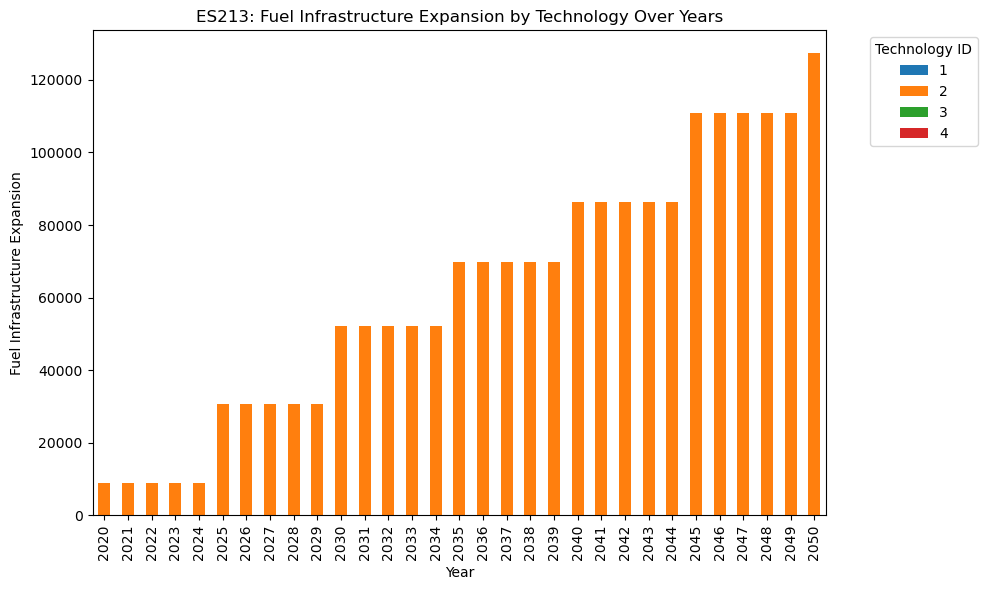

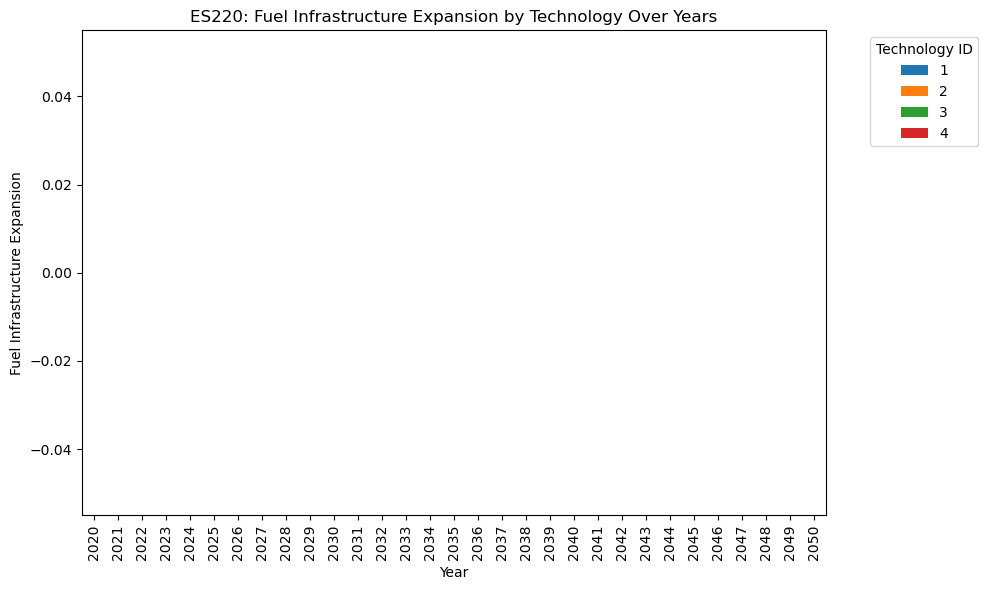

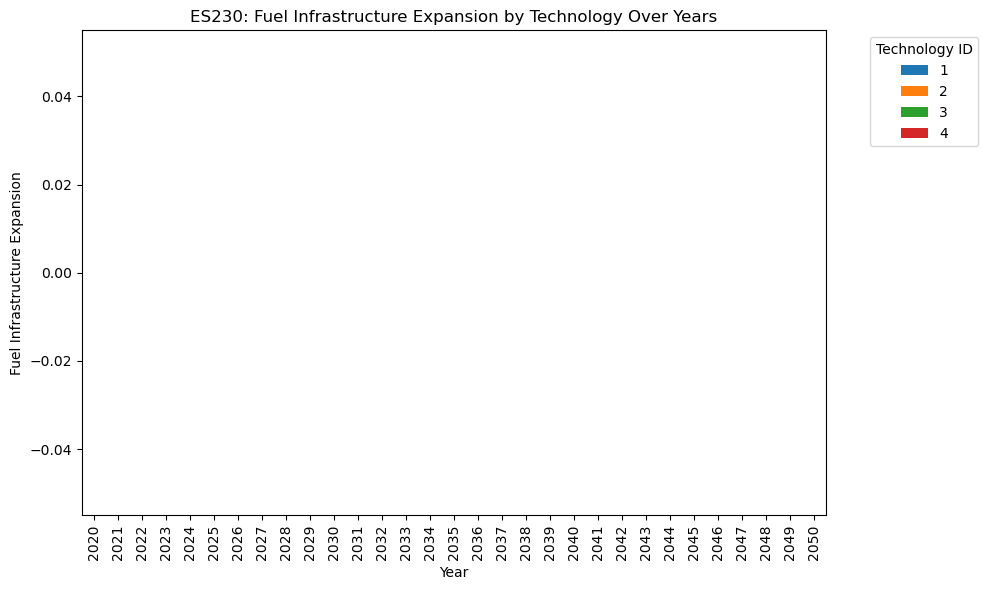

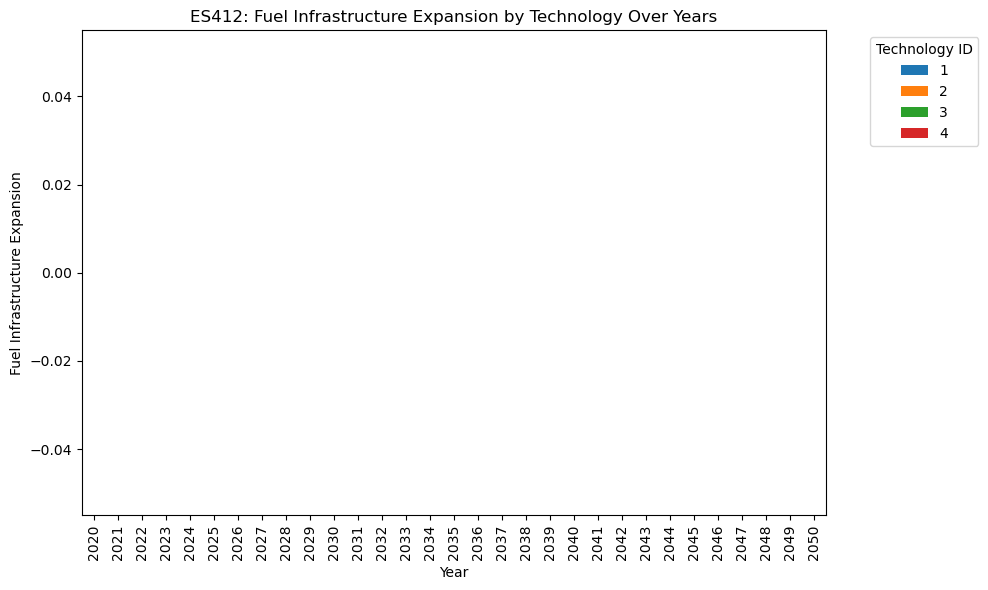

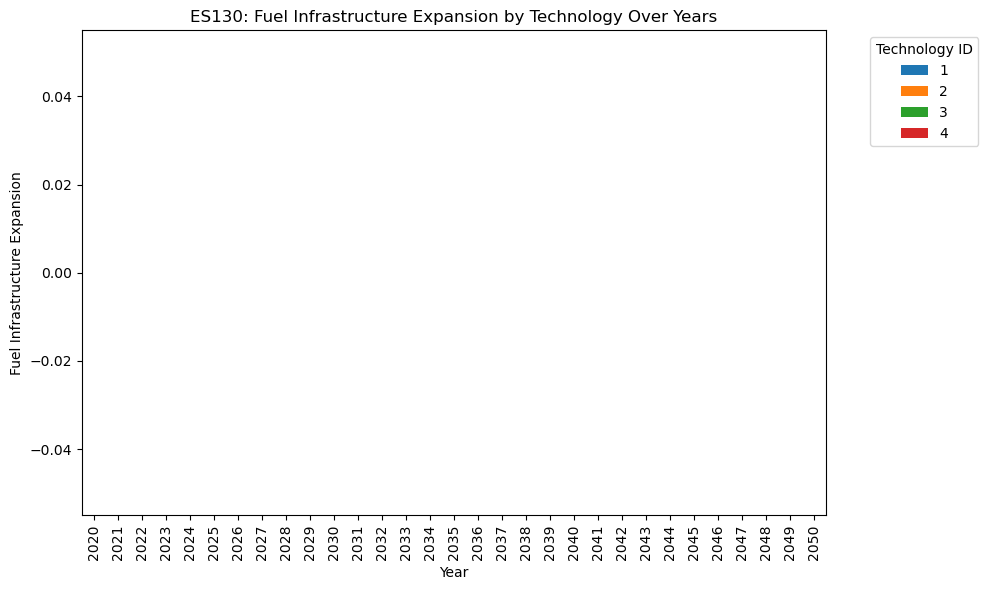

In [59]:
# for each geom_item

geometric_element_list = input_data["GeographicElement"]

geometric_element_list = {item["id"]: item for item in geometric_element_list}

for e in geographic_element_list.keys():
    q_plus_by_tech = get_fuel_infr_plus(True, [e])

    fig, ax = plt.subplots(figsize=(10, 6))

    years = range(y_init, Y_end + 1)
    tech_ids = list(technology_list.keys())

    # Prepare data for stacked bar plot
    data = {year: [q_plus_by_tech.get((year, tech_id), 0) for tech_id in tech_ids] for year in years}
    df = pd.DataFrame(data, index=tech_ids).T

    # Plotting
    df.plot(kind='bar', stacked=True, ax=ax)
    ax.set_xlabel('Year')
    ax.set_ylabel('Fuel Infrastructure Expansion')
    ax.set_title(str(geographic_element_list[e]["name"]) + ': Fuel Infrastructure Expansion by Technology Over Years')
    plt.legend(title='Technology ID', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [60]:
# installed cap per e 

geometric_element_list = input_data["GeographicElement"]

geometric_element_list = {item["id"]: item for item in geometric_element_list}
for e in geographic_element_list.keys():
    for fuel in fuel_list.keys():
        total_expansion_per_y = sum(q_fuel_infr_plus[(y, fuel, e)] for y in range(y_init, Y_end+1) if (y, fuel, e) in q_fuel_infr_plus.keys())
        if geographic_element_list[e]["name"] in ["ES213", "ES211", "ES212"]:
            print(geographic_element_list[e]["name"], fuel_list[fuel]["name"], total_expansion_per_y)


ES211 diesel 0.0
ES211 electricity 45000.0
ES212 diesel 0.0
ES212 electricity 78490.830674
ES213 diesel 0.0
ES213 electricity 127310.286045


In [61]:
def get_s_per_year_and_tech(tech_id_list = ["diesel", "electricity"]):
    s_per_year_and_tech = {}

    for t in tech_id_list:
        for y in range(y_init, Y_end + 1):
            total_s_per_y = sum(s[(y, (1, r, odpair_list[r]["path_id"], e), tv)] for r in odpair_list.keys() for tv in technology_list.keys() for e in geographic_element_list.keys() if (y, (1, r, odpair_list[r]["path_id"], e), tv) in s.keys() and technology_list[techvehicle_list[tv]["technology"]]["fuel"] in (tech_id_list))
            s_per_year_and_tech[(y, t)] = total_s_per_y
    return s_per_year_and_tech


In [62]:
energy_fueled_diesel = get_s_per_year_and_tech(tech_id_list=["diesel"])
energy_fueled_electricity = get_s_per_year_and_tech(tech_id_list=["electricity"])
print(energy_fueled_diesel)
print(energy_fueled_electricity)

{(2020, 'diesel'): 588147401.798349, (2021, 'diesel'): 1173953507.992358, (2022, 'diesel'): 1719848296.525031, (2023, 'diesel'): 2096837541.134123, (2024, 'diesel'): 2250855678.7688313, (2025, 'diesel'): 2383298671.468101, (2026, 'diesel'): 2406474536.690445, (2027, 'diesel'): 2676520003.643508, (2028, 'diesel'): 2699388450.724185, (2029, 'diesel'): 2907545166.0578, (2030, 'diesel'): 2901658735.6205, (2031, 'diesel'): 3032778003.180291, (2032, 'diesel'): 3041494277.607461, (2033, 'diesel'): 3090586906.838987, (2034, 'diesel'): 3094439977.492845, (2035, 'diesel'): 3052791294.479847, (2036, 'diesel'): 3025877317.610935, (2037, 'diesel'): 2970576339.877652, (2038, 'diesel'): 2867126454.415135, (2039, 'diesel'): 2770865917.300276, (2040, 'diesel'): 2581409194.687605, (2041, 'diesel'): 2376722743.996275, (2042, 'diesel'): 2195031809.100196, (2043, 'diesel'): 2012515075.906053, (2044, 'diesel'): 1848711822.721174, (2045, 'diesel'): 1674413756.619331, (2046, 'diesel'): 1529620888.074017, (204

In [63]:
# check total investments per technology
data = {year: [q_plus_by_tech.get((year, tech_id), 0) for tech_id in tech_ids if tech_id == 1] for year in years}
print(data)


{2020: [0.0], 2021: [0.0], 2022: [0.0], 2023: [0.0], 2024: [0.0], 2025: [0.0], 2026: [0.0], 2027: [0.0], 2028: [0.0], 2029: [0.0], 2030: [0.0], 2031: [0.0], 2032: [0.0], 2033: [0.0], 2034: [0.0], 2035: [0.0], 2036: [0.0], 2037: [0.0], 2038: [0.0], 2039: [0.0], 2040: [0.0], 2041: [0.0], 2042: [0.0], 2043: [0.0], 2044: [0.0], 2045: [0.0], 2046: [0.0], 2047: [0.0], 2048: [0.0], 2049: [0.0], 2050: [0.0]}


In [64]:
# check tech_shift 
def get_f_per_tech(tech_id_list = ["diesel", "electricity"]):
    f_per_tech_and_year = {}
    for t in tech_id_list:
        for y in range(y_init, Y_end + 1):
            total_activity_per_tech = sum(f[(y, (1, r, odpair_list[r]["path_id"]), (1, tv), g)] for r in odpair_list.keys() for tv in techvehicle_list.keys() for g in range(g_init, y + 1) if (y, (1, r, odpair_list[r]["path_id"]), (1, tv), g) in f.keys() and technology_list[techvehicle_list[tv]["technology"]]["fuel"] in tech_id_list)
            f_per_tech_and_year[(y, t)] = total_activity_per_tech
    return f_per_tech_and_year

In [65]:
f_per_tech_diesel = get_f_per_tech(tech_id_list=["diesel"])
f_per_tech_electricity = get_f_per_tech(tech_id_list=["electricity"])
print(f_per_tech_diesel)
print(f_per_tech_electricity)

{(2020, 'diesel'): 446207065.996531, (2021, 'diesel'): 441069035.42321503, (2022, 'diesel'): 431613852.910789, (2023, 'diesel'): 422077343.932812, (2024, 'diesel'): 413152882.948994, (2025, 'diesel'): 401736117.724718, (2026, 'diesel'): 387128769.369124, (2027, 'diesel'): 375356677.549721, (2028, 'diesel'): 365424718.371424, (2029, 'diesel'): 360759723.159207, (2030, 'diesel'): 353223126.242588, (2031, 'diesel'): 344049756.050241, (2032, 'diesel'): 336682238.056128, (2033, 'diesel'): 327501004.843566, (2034, 'diesel'): 317725487.958428, (2035, 'diesel'): 307195684.531694, (2036, 'diesel'): 297588382.883862, (2037, 'diesel'): 287935067.967896, (2038, 'diesel'): 278138523.480146, (2039, 'diesel'): 268583047.72897, (2040, 'diesel'): 250407361.670985, (2041, 'diesel'): 232690242.437302, (2042, 'diesel'): 215421636.775174, (2043, 'diesel'): 198587635.667249, (2044, 'diesel'): 182178785.756622, (2045, 'diesel'): 166184501.275089, (2046, 'diesel'): 153093879.013642, (2047, 'diesel'): 14075855

In [66]:
def get_f_by_mode(mode_list=[1, 2]):
    f_per_mode = {}
    for m in mode_list:
        for y in range(y_init, Y_end + 1):
            total_activity_per_tech = sum(f[(y, (1, r, odpair_list[r]["path_id"]), (m, tv), g)] for r in odpair_list.keys() for tv in range(1, max(techvehicle_list.keys()) + 2) for g in range(g_init, y + 1) if (y, (1, r, odpair_list[r]["path_id"]), (m, tv), g) in f.keys())
            f_per_mode[(y, m)] = total_activity_per_tech
    return f_per_mode

In [67]:
f_per_mode_1 = get_f_by_mode(mode_list=[1])
f_per_mode_2 = get_f_by_mode(mode_list=[2])
print(f_per_mode_1)
print(f_per_mode_2)


{(2020, 1): 61775026.992682, (2021, 1): 114769249.515406, (2022, 1): 169154968.066365, (2023, 1): 208869010.425179, (2024, 1): 229420652.86940598, (2025, 1): 251428280.83564898, (2026, 1): 267402698.389347, (2027, 1): 305347817.036853, (2028, 1): 316977043.713663, (2029, 1): 344516007.235665, (2030, 1): 353796378.659886, (2031, 1): 381525596.98875, (2032, 1): 391764369.336708, (2033, 1): 403657769.48067, (2034, 1): 415944211.473634, (2035, 1): 424231814.1274, (2036, 1): 432019771.367518, (2037, 1): 442612605.505291, (2038, 1): 444138517.738752, (2039, 1): 449012221.661015, (2040, 1): 453721651.920014, (2041, 1): 456313300.375263, (2042, 1): 456777512.846863, (2043, 1): 457330685.438467, (2044, 1): 457766360.75714, (2045, 1): 457592593.504724, (2046, 1): 457417088.579771, (2047, 1): 457239828.605567, (2048, 1): 457061927.967659, (2049, 1): 456881116.387343, (2050, 1): 456912553.711046}
{(2020, 2): 0, (2021, 2): 0, (2022, 2): 0, (2023, 2): 0, (2024, 2): 0, (2025, 2): 0, (2026, 2): 0, (20

In [68]:
f_per_tech = get_f_per_tech()
print(f_per_tech)
print(fuel_list)
print(od_pair_list_by_year)
print(technology_list.keys())
for y in range(y_init, Y_end + 1):
    val1 = sum(f_per_tech[(y, fuel_list[f]["name"])] for f in fuel_list.keys())
    val2 = od_pair_list_by_year[y]
    print(f"Year: {y}", val1, val2, val1 - val2, val1 >= val2)




{(2020, 'diesel'): 461434152.27417, (2021, 'diesel'): 461308486.366914, (2022, 'diesel'): 461171056.154854, (2023, 'diesel'): 461043086.905659, (2024, 'diesel'): 460902086.914714, (2025, 'diesel'): 460759676.923863, (2026, 'diesel'): 460615842.833092, (2027, 'diesel'): 460470570.401421, (2028, 'diesel'): 460323845.245437, (2029, 'diesel'): 460175652.837889, (2030, 'diesel'): 460025978.506265, (2031, 'diesel'): 459874807.431322, (2032, 'diesel'): 459722124.645633, (2033, 'diesel'): 459567915.032086, (2034, 'diesel'): 459412163.322419, (2035, 'diesel'): 459254854.09564, (2036, 'diesel'): 459095971.776586, (2037, 'diesel'): 458935500.634353, (2038, 'diesel'): 458773424.780695, (2039, 'diesel'): 458609728.168506, (2040, 'diesel'): 458444394.590184, (2041, 'diesel'): 458277407.676078, (2042, 'diesel'): 458108750.892834, (2043, 'diesel'): 457938407.541748, (2044, 'diesel'): 457766360.75714, (2045, 'diesel'): 457592593.504724, (2046, 'diesel'): 457417088.579771, (2047, 'diesel'): 457239828.60

In [69]:
mode_list = input_data["Mode"]
mode_list = {item["id"]: item for item in mode_list}
product_list = input_data["Product"]
product_list = {item["id"]: item for item in product_list}
vehicle_type_list = input_data["Vehicletype"]
vehicle_type_list = {item["name"]: item for item in vehicle_type_list}
path_list = input_data["Path"]
path_list = {item["id"]: item for item in path_list}

for y in range(y_init, 2022):
    for r in range(1, 4):
        val1 = sum(f[(y, (p, r, odpair_list[r]["path_id"]), (mode_id, tv), g)] for mode_id in [1, 2] for p in product_list.keys() for r in odpair_list.keys() for tv in range(0, 5) for g in range(g_init, y + 1) if (y, (p, r, odpair_list[r]["path_id"]), (mode_id, tv), g) in f.keys())
        val2 = odpair_list[r]["F"][y - y_init]
        print(f"Year: {y}, Odpair: {r}", val1, val2, val1 - val2)


Year: 2020, Odpair: 1 461421683.744062 5060282.0 456361401.744062
Year: 2020, Odpair: 2 461421683.744062 5060282.0 456361401.744062
Year: 2020, Odpair: 3 461421683.744062 5060282.0 456361401.744062
Year: 2021, Odpair: 1 461243751.827284 5060282.0 456183469.827284
Year: 2021, Odpair: 2 461243751.827284 5060282.0 456183469.827284
Year: 2021, Odpair: 3 461243751.827284 5060282.0 456183469.827284


## Mode shift

- by trip
- by pkm

In [70]:
F_sum = 0
mode_list = input_data["Mode"]
mode_list = {item["id"]: item for item in mode_list}
product_list = input_data["Product"]
product_list = {item["id"]: item for item in product_list}
vehicle_type_list = input_data["Vehicletype"]
vehicle_type_list = {item["name"]: item for item in vehicle_type_list}
path_list = input_data["Path"]
path_list = {item["id"]: item for item in path_list}
print(path_list)
activity_per_mode =  {}
financial_status_list = ["Commercial", "First quintile", "Second quintile", "Third quintile", "Fourth quintile", "Fifth quintile"]
# financial_status_list = ["Commercial"]

activity_per_mode_pkm = {}
for mode in mode_list.keys():
    mode_id = mode_list[mode]["id"]
    mode_name = mode_list[mode]["name"]

    for y in range(y_init, Y_end):
        total_activity_per_mode = sum(f[(y, (p, r, odpair_list[r]["path_id"]), (mode_id, tv), g)] for p in product_list.keys() for r in odpair_list.keys() for tv in range(0, len(odpair_list)) for g in range(g_init, y + 1) if (y, (p, r, odpair_list[r]["path_id"]), (mode_id, tv), g) in f.keys() and odpair_list[r]["financial_status"] in financial_status_list)
        
        total_activity_per_mode_pkm = sum(f[(y, (p, r, odpair_list[r]["path_id"]), (mode_id, tv), g)] * path_list[odpair_list[r]["path_id"]]["length"] for p in product_list.keys() for r in odpair_list.keys() for tv in range(0, 17) for g in range(g_init, y + 1) if (y, (p, r, odpair_list[r]["path_id"]), (mode_id, tv), g) in f.keys() and odpair_list[r]["financial_status"] in financial_status_list)
        if y == 2020:
            F_sum = total_activity_per_mode_pkm + F_sum
        total_pkm = sum(path_list[odpair_list[r]["path_id"]]["length"] for p in product_list.keys() for r in odpair_list.keys() for tv in range(0, 17) for g in range(g_init, y + 1) if (y, (p, r, odpair_list[r]["path_id"]), (mode_id, tv), g) in f.keys() and odpair_list[r]["financial_status"] in financial_status_list)
        activity_per_mode[(y, mode_id)] = total_activity_per_mode
        activity_per_mode_pkm[(y, mode_id)] = total_activity_per_mode_pkm
        print("Year:", y, "Mode:", mode_name, "Activity:", total_activity_per_mode, "Activity pkm:", total_activity_per_mode_pkm, total_pkm)

print("F_sum:", F_sum)


{0: {'id': 0, 'length': 28.0, 'name': '0', 'sequence': [12]}, 1: {'id': 1, 'length': 32.0, 'name': '1', 'sequence': [12]}, 2: {'id': 2, 'length': 36.0, 'name': '2', 'sequence': [12]}, 3: {'id': 3, 'length': 92.0, 'name': '3', 'sequence': [12]}, 4: {'id': 4, 'length': 32.0, 'name': '4', 'sequence': [12]}, 5: {'id': 5, 'length': 48.0, 'name': '5', 'sequence': [12]}, 6: {'id': 6, 'length': 396.0, 'name': '6', 'sequence': [13, 7, 12]}, 7: {'id': 7, 'length': 28.0, 'name': '7', 'sequence': [13]}, 8: {'id': 8, 'length': 32.0, 'name': '8', 'sequence': [13]}, 9: {'id': 9, 'length': 36.0, 'name': '9', 'sequence': [13]}, 10: {'id': 10, 'length': 92.0, 'name': '10', 'sequence': [13]}, 11: {'id': 11, 'length': 32.0, 'name': '11', 'sequence': [13]}, 12: {'id': 12, 'length': 48.0, 'name': '12', 'sequence': [13]}, 13: {'id': 13, 'length': 396.0, 'name': '13', 'sequence': [12, 7, 13]}, 14: {'id': 14, 'length': 388.0, 'name': '14', 'sequence': [14, 4, 13]}, 15: {'id': 15, 'length': 252.0, 'name': '15',

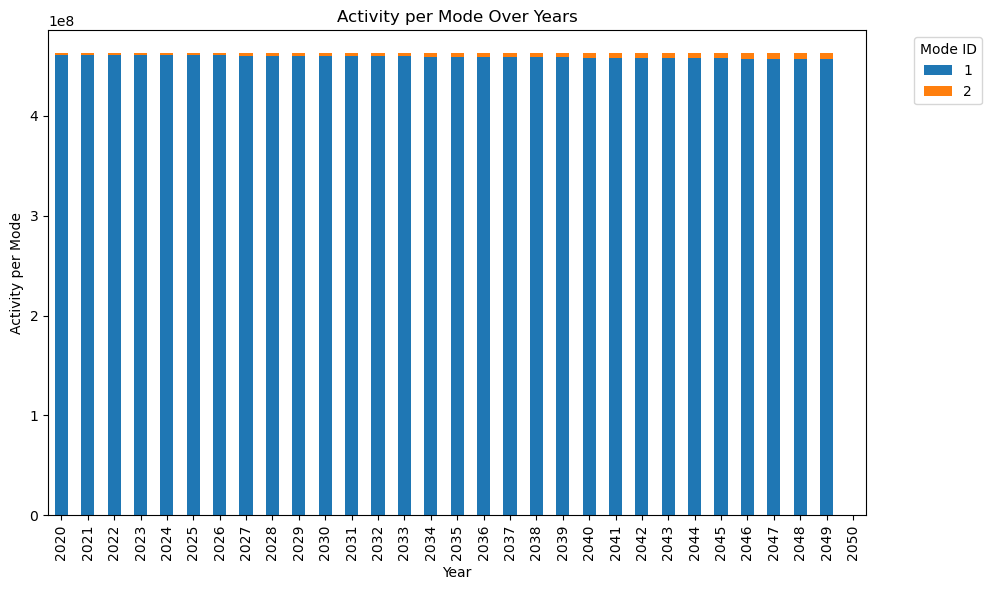

{(2020, 1): 461434152.27417,
 (2021, 1): 461308486.366914,
 (2022, 1): 461171056.154854,
 (2023, 1): 461043086.905659,
 (2024, 1): 460902086.914714,
 (2025, 1): 460759676.923863,
 (2026, 1): 460615842.833092,
 (2027, 1): 460470570.401421,
 (2028, 1): 460323845.245437,
 (2029, 1): 460175652.837889,
 (2030, 1): 460025978.506265,
 (2031, 1): 459874807.431322,
 (2032, 1): 459722124.645633,
 (2033, 1): 459567915.032086,
 (2034, 1): 459412163.322419,
 (2035, 1): 459254854.09564,
 (2036, 1): 459095971.776586,
 (2037, 1): 458935500.634353,
 (2038, 1): 458773424.780695,
 (2039, 1): 458609728.168506,
 (2040, 1): 458444394.590184,
 (2041, 1): 458277407.676078,
 (2042, 1): 458108750.892834,
 (2043, 1): 457938407.541748,
 (2044, 1): 457766360.75714,
 (2045, 1): 457592593.504724,
 (2046, 1): 457417088.579771,
 (2047, 1): 457239828.605567,
 (2048, 1): 457061927.967659,
 (2049, 1): 456881116.387343,
 (2020, 2): 1165363.725871,
 (2021, 2): 1291029.633124,
 (2022, 2): 1428459.845194,
 (2023, 2): 1556429

In [71]:

fig, ax = plt.subplots(figsize=(10, 6))

years = range(y_init, Y_end + 1)
mode_ids = list(set(mode_id for _, mode_id in activity_per_mode.keys()))

# Prepare data for stacked bar plot
data = {year: [activity_per_mode.get((year, mode_id), 0) for mode_id in mode_ids] for year in years}
df = pd.DataFrame(data, index=mode_ids).T

# Plotting
df.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Year')
ax.set_ylabel('Activity per Mode')
ax.set_title('Activity per Mode Over Years')
plt.legend(title='Mode ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
activity_per_mode


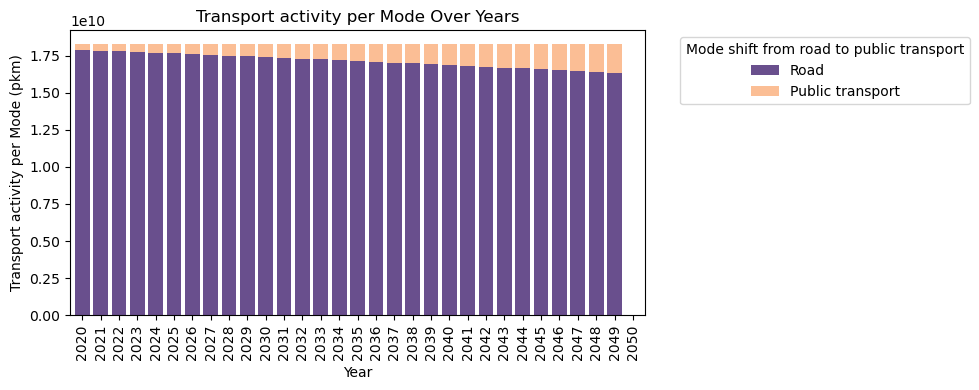

874903.6374738744
17883030349.965992


In [72]:
mode_names = {1: "Road", 2: "Public transport"}

fig, ax = plt.subplots(figsize=(10, 4))

years = range(y_init, Y_end + 1)
mode_ids = list(set(mode_id for _, mode_id in activity_per_mode_pkm.keys()))

# Prepare data for stacked bar plot
data = {year: [activity_per_mode_pkm.get((year, mode_id), 0) for mode_id in mode_ids] for year in years}
df = pd.DataFrame(data, index=mode_ids).T

# Plotting
df.plot(kind='bar', stacked=True, ax=ax, color = ["#432371", "#faae7b"], alpha=0.8, width=0.8)
ax.set_xlabel('Year')
ax.set_ylabel('Transport activity per Mode (pkm)')
ax.set_title('Transport activity per Mode Over Years')
ax.legend(
    labels=[mode_names[mode_id] for mode_id in mode_ids],
    title='Mode shift from road to public transport',
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()
plt.savefig(os.path.normpath(file_results + "/" + case_study_name + "_activity_per_mode_pkm.png"), transparent=True)
plt.show()
print(activity_per_mode_pkm[(2020, 1)]/ (1.4 * 14600))
print(activity_per_mode_pkm[(2020, 1)])

In [73]:
print(mode_list.keys())

dict_keys([1, 2])


In [74]:
geometric_element_list = input_data["GeographicElement"]

geometric_element_list_by_id = {item["id"]: item for item in geometric_element_list}
geometric_element_list_by_name = {item["name"]: item for item in geometric_element_list}

fuel_list = input_data["Fuel"]
fuel_list_by_id = {item["id"]: item for item in fuel_list}
fuel_list_by_name = {item["name"]: item for item in fuel_list}

# Development of detour time by edge
def get_detour_time_by_edge(by_geom = False, by_fuel = False, geoms = [], fuels = []):
    if by_geom:
        geom_list = geoms
    else:
        geom_list = geometric_element_list_by_name.keys()

    if by_fuel:
        fuels_list = fuels
    else:
        fuels_list = fuel_list.keys()

    detour_time_by_edge = {}
    detour_time_at_place = {}
    for y in range(y_init, Y_end + 1):
        for e in geom_list:
            for fuel in fuels_list:
                tot_veh = 0
                fuel_id = fuel_list_by_name[fuel]["id"]
                for r in odpair_list.keys():
                    # if (y, geometric_element_list_by_name[e]["id"], (1, r, odpair_list[r]["path_id"]), fuel_list_by_name[fuel]["id"]) in detour_time.keys():
                    fueling_vehs = n_fueling[(y, (1, r, odpair_list[r]["path_id"], geometric_element_list_by_name[e]["id"]), fuel_id)]
                        # print(r, fueling_vehs)
                    tot_veh = tot_veh + fueling_vehs
                        # total_detour_time_per_y = sum(detour_time[(y, geometric_element_list_by_name[e]["id"], (1, r, odpair_list[r]["path_id"]), fuel_list_by_name[fuel]["id"])])
                        # detour_time_by_edge[(y, geometric_element_list_by_name[e]["id"], fuel)] = total_detour_time_per_y
                print (y, tot_veh)
                total_detour_time_per_y = sum(detour_time[(y, (p, r, odpair_list[r]["path_id"], geometric_element_list_by_name[e]["id"]), fuel_list_by_name[fuel]["id"])] for r in odpair_list.keys() for p in product_list.keys() if (y, (p, r, odpair_list[r]["path_id"], geometric_element_list_by_name[e]["id"]), fuel_list_by_name[fuel]["id"]) in detour_time.keys())
                if not tot_veh == 0:

                    detour_time_av = total_detour_time_per_y / tot_veh
                else:
                    detour_time_av = 0
                detour_time_by_edge[(y, geometric_element_list_by_name[e]["id"], fuel)] = total_detour_time_per_y
                detour_time_at_place[(y, geometric_element_list_by_name[e]["id"], fuel)] = detour_time_av
    return detour_time_by_edge, detour_time_at_place

In [75]:
# electricity 
# getting detour time 
detour_time_by_edge, detour_time_at_place = get_detour_time_by_edge(by_geom=True, by_fuel=True, geoms=["ES211"], fuels=["electricity"])

for k in detour_time_at_place.keys():
    print(k, detour_time_at_place[k])
print(detour_time_at_place)

NameError: name 'n_fueling' is not defined

In [ ]:
# diesel
detour_time_by_edge, detour_time_by_place = get_detour_time_by_edge(by_geom=True, by_fuel=True, geoms=["ES211"], fuels=["diesel"])

for k in detour_time_at_place.keys():
    print(k, detour_time_at_place[k])
print(detour_time_at_place)

2020 0
2021 0
2022 0
2023 0
2024 0
2025 0
2026 0
2027 0
2028 0
2029 0
2030 0
2031 0
2032 0
2033 0
2034 0
2035 0
2036 0
2037 0
2038 0
2039 0
2040 0
2041 0
2042 0
2043 0
2044 0
2045 0
2046 0
2047 0
2048 0
2049 0
2050 0
(2020, 12, 'electricity') 0
(2021, 12, 'electricity') 0
(2022, 12, 'electricity') 0
(2023, 12, 'electricity') 0
(2024, 12, 'electricity') 0
(2025, 12, 'electricity') 0
(2026, 12, 'electricity') 0
(2027, 12, 'electricity') 0
(2028, 12, 'electricity') 0
(2029, 12, 'electricity') 0
(2030, 12, 'electricity') 0
(2031, 12, 'electricity') 0
(2032, 12, 'electricity') 0
(2033, 12, 'electricity') 0
(2034, 12, 'electricity') 0
(2035, 12, 'electricity') 0
(2036, 12, 'electricity') 0
(2037, 12, 'electricity') 0
(2038, 12, 'electricity') 0
(2039, 12, 'electricity') 0
(2040, 12, 'electricity') 0
(2041, 12, 'electricity') 0
(2042, 12, 'electricity') 0
(2043, 12, 'electricity') 0
(2044, 12, 'electricity') 0
(2045, 12, 'electricity') 0
(2046, 12, 'electricity') 0
(2047, 12, 'electricity') 0

In [ ]:
geometric_element_list = input_data["GeographicElement"]

geometric_element_list_by_id = {item["id"]: item for item in geometric_element_list}
geometric_element_list_by_name = {item["name"]: item for item in geometric_element_list}

fuel_list = input_data["Fuel"]
fuel_list_by_id = {item["id"]: item for item in fuel_list}
fuel_list_by_name = {item["name"]: item for item in fuel_list}

# Development of detour time by edge
def get_nb_vehs(by_geom = False, by_fuel = False, geoms = [], fuels = []):
    if by_geom:
        geom_list = geoms
    else:
        geom_list = geometric_element_list_by_name.keys()

    if by_fuel:
        fuels_list = fuels
    else:
        fuels_list = fuel_list.keys()

    nb_vehs_fueling = {}
    detour_time_at_place = {}
    for y in range(y_init, Y_end + 1):
        for e in geom_list:
            for fuel in fuels_list:
                tot_veh = 0

                for r in odpair_list.keys():
                    if (y, geometric_element_list_by_name[e]["id"], (1, r, odpair_list[r]["path_id"]), fuel_list_by_name[fuel]["id"]) in detour_time.keys():
                        fueling_vehs = sum(n_fueling[(y, (1, r, odpair_list[r]["path_id"], e), tv)] for tv in techvehicle_list.keys() for e in geographic_element_list.keys() if (y, (1, r, odpair_list[r]["path_id"], e), tv) in n_fueling.keys() and technology_list[techvehicle_list[tv]["technology"]]["fuel"] in fuels_list)
                        # print(r, fueling_vehs)
                        tot_veh = tot_veh + fueling_vehs
                        # total_detour_time_per_y = sum(detour_time[(y, geometric_element_list_by_name[e]["id"], (1, r, odpair_list[r]["path_id"]), fuel_list_by_name[fuel]["id"])])
                        # detour_time_by_edge[(y, geometric_element_list_by_name[e]["id"], fuel)] = total_detour_time_per_y
                print (y, tot_veh)
                
                nb_vehs_fueling[(y, geometric_element_list_by_name[e]["id"], fuel)] = tot_veh
    return nb_vehs_fueling

In [ ]:
nb_vehs_fueling = get_nb_vehs(by_geom=True, by_fuel=True, geoms=["ES211"], fuels=["electricity"])
print(nb_vehs_fueling)

2020 0
2021 0
2022 0
2023 0
2024 0
2025 0
2026 0
2027 0
2028 0
2029 0
2030 0
2031 0
2032 0
2033 0
2034 0
2035 0
2036 0
2037 0
2038 0
2039 0
2040 0
2041 0
2042 0
2043 0
2044 0
2045 0
2046 0
2047 0
2048 0
2049 0
2050 0
{(2020, 12, 'electricity'): 0, (2021, 12, 'electricity'): 0, (2022, 12, 'electricity'): 0, (2023, 12, 'electricity'): 0, (2024, 12, 'electricity'): 0, (2025, 12, 'electricity'): 0, (2026, 12, 'electricity'): 0, (2027, 12, 'electricity'): 0, (2028, 12, 'electricity'): 0, (2029, 12, 'electricity'): 0, (2030, 12, 'electricity'): 0, (2031, 12, 'electricity'): 0, (2032, 12, 'electricity'): 0, (2033, 12, 'electricity'): 0, (2034, 12, 'electricity'): 0, (2035, 12, 'electricity'): 0, (2036, 12, 'electricity'): 0, (2037, 12, 'electricity'): 0, (2038, 12, 'electricity'): 0, (2039, 12, 'electricity'): 0, (2040, 12, 'electricity'): 0, (2041, 12, 'electricity'): 0, (2042, 12, 'electricity'): 0, (2043, 12, 'electricity'): 0, (2044, 12, 'electricity'): 0, (2045, 12, 'electricity'): 0, (2